**Run the following two cells before you begin.**

In [1]:
%autosave 10

Autosaving every 10 seconds


In [2]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, roc_curve

%matplotlib inline

[-3.  -2.9 -2.8 -2.7 -2.6] ... [4.6 4.7 4.8 4.9 5. ]


Text(0.5, 1.0, 'Error surface')

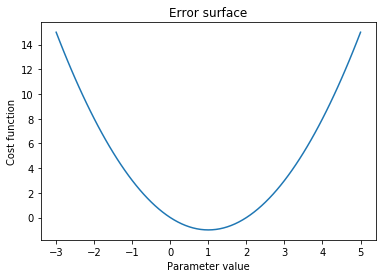

In [3]:
X_poly = np.linspace(-3,5,81)
print(X_poly[:5], '...', X_poly[-5:])
def cost_function(X):
    return X * (X-2)
y_poly = cost_function(X_poly)
plt.plot(X_poly, y_poly)
plt.xlabel('Parameter value')
plt.ylabel('Cost function')
plt.title('Error surface')

In [4]:
def gradient(X):
    return (2*X) - 2
x_start = 4.5
learning_rate = 0.75
x_next = x_start - gradient(x_start)*learning_rate
x_next

-0.75

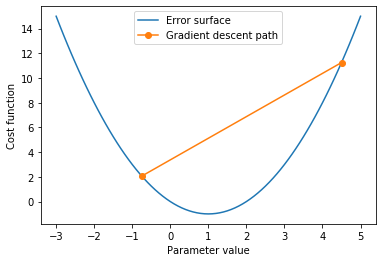

In [5]:
plt.plot(X_poly, y_poly)
plt.plot([x_start, x_next], [cost_function(x_start), cost_function(x_next)], '-o')
plt.xlabel('Parameter value')
plt.ylabel('Cost function')
plt.legend(['Error surface', 'Gradient descent path'])

In [6]:
iterations = 15
x_path = np.empty(iterations,)
x_path[0] = x_start
for iteration_count in range(1,iterations):
    derivative = gradient(x_path[iteration_count-1])
    x_path[iteration_count] = x_path[iteration_count-1] - (derivative*learning_rate)
x_path

array([ 4.5       , -0.75      ,  1.875     ,  0.5625    ,  1.21875   ,
        0.890625  ,  1.0546875 ,  0.97265625,  1.01367188,  0.99316406,
        1.00341797,  0.99829102,  1.00085449,  0.99957275,  1.00021362])

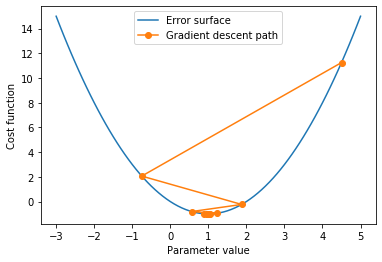

In [7]:
plt.plot(X_poly, y_poly)
plt.plot(x_path, cost_function(x_path), '-o')
plt.xlabel('Parameter value')
plt.ylabel('Cost function')
plt.legend(['Error surface', 'Gradient descent path'])

**First, import the cleaned data set. Then, select the features from the DataFrame of the case study data.**
    
These features should be: `'LIMIT_BAL'`, `'EDUCATION'`, `'MARRIAGE'`, `'AGE'`, `'PAY_1'`, `'BILL_AMT1'`, `'BILL_AMT2'`, `'BILL_AMT3'`, `'BILL_AMT4'`, `'BILL_AMT5'`, `'BILL_AMT6'`, `'PAY_AMT1'`, `'PAY_AMT2'`, `'PAY_AMT3'`, `'PAY_AMT4'`, `'PAY_AMT5'`, AND `'PAY_AMT6'`.

In [8]:
# Import data set
df = pd.read_csv('cleaned_data.csv')

In [9]:
features_response = df.columns.tolist()

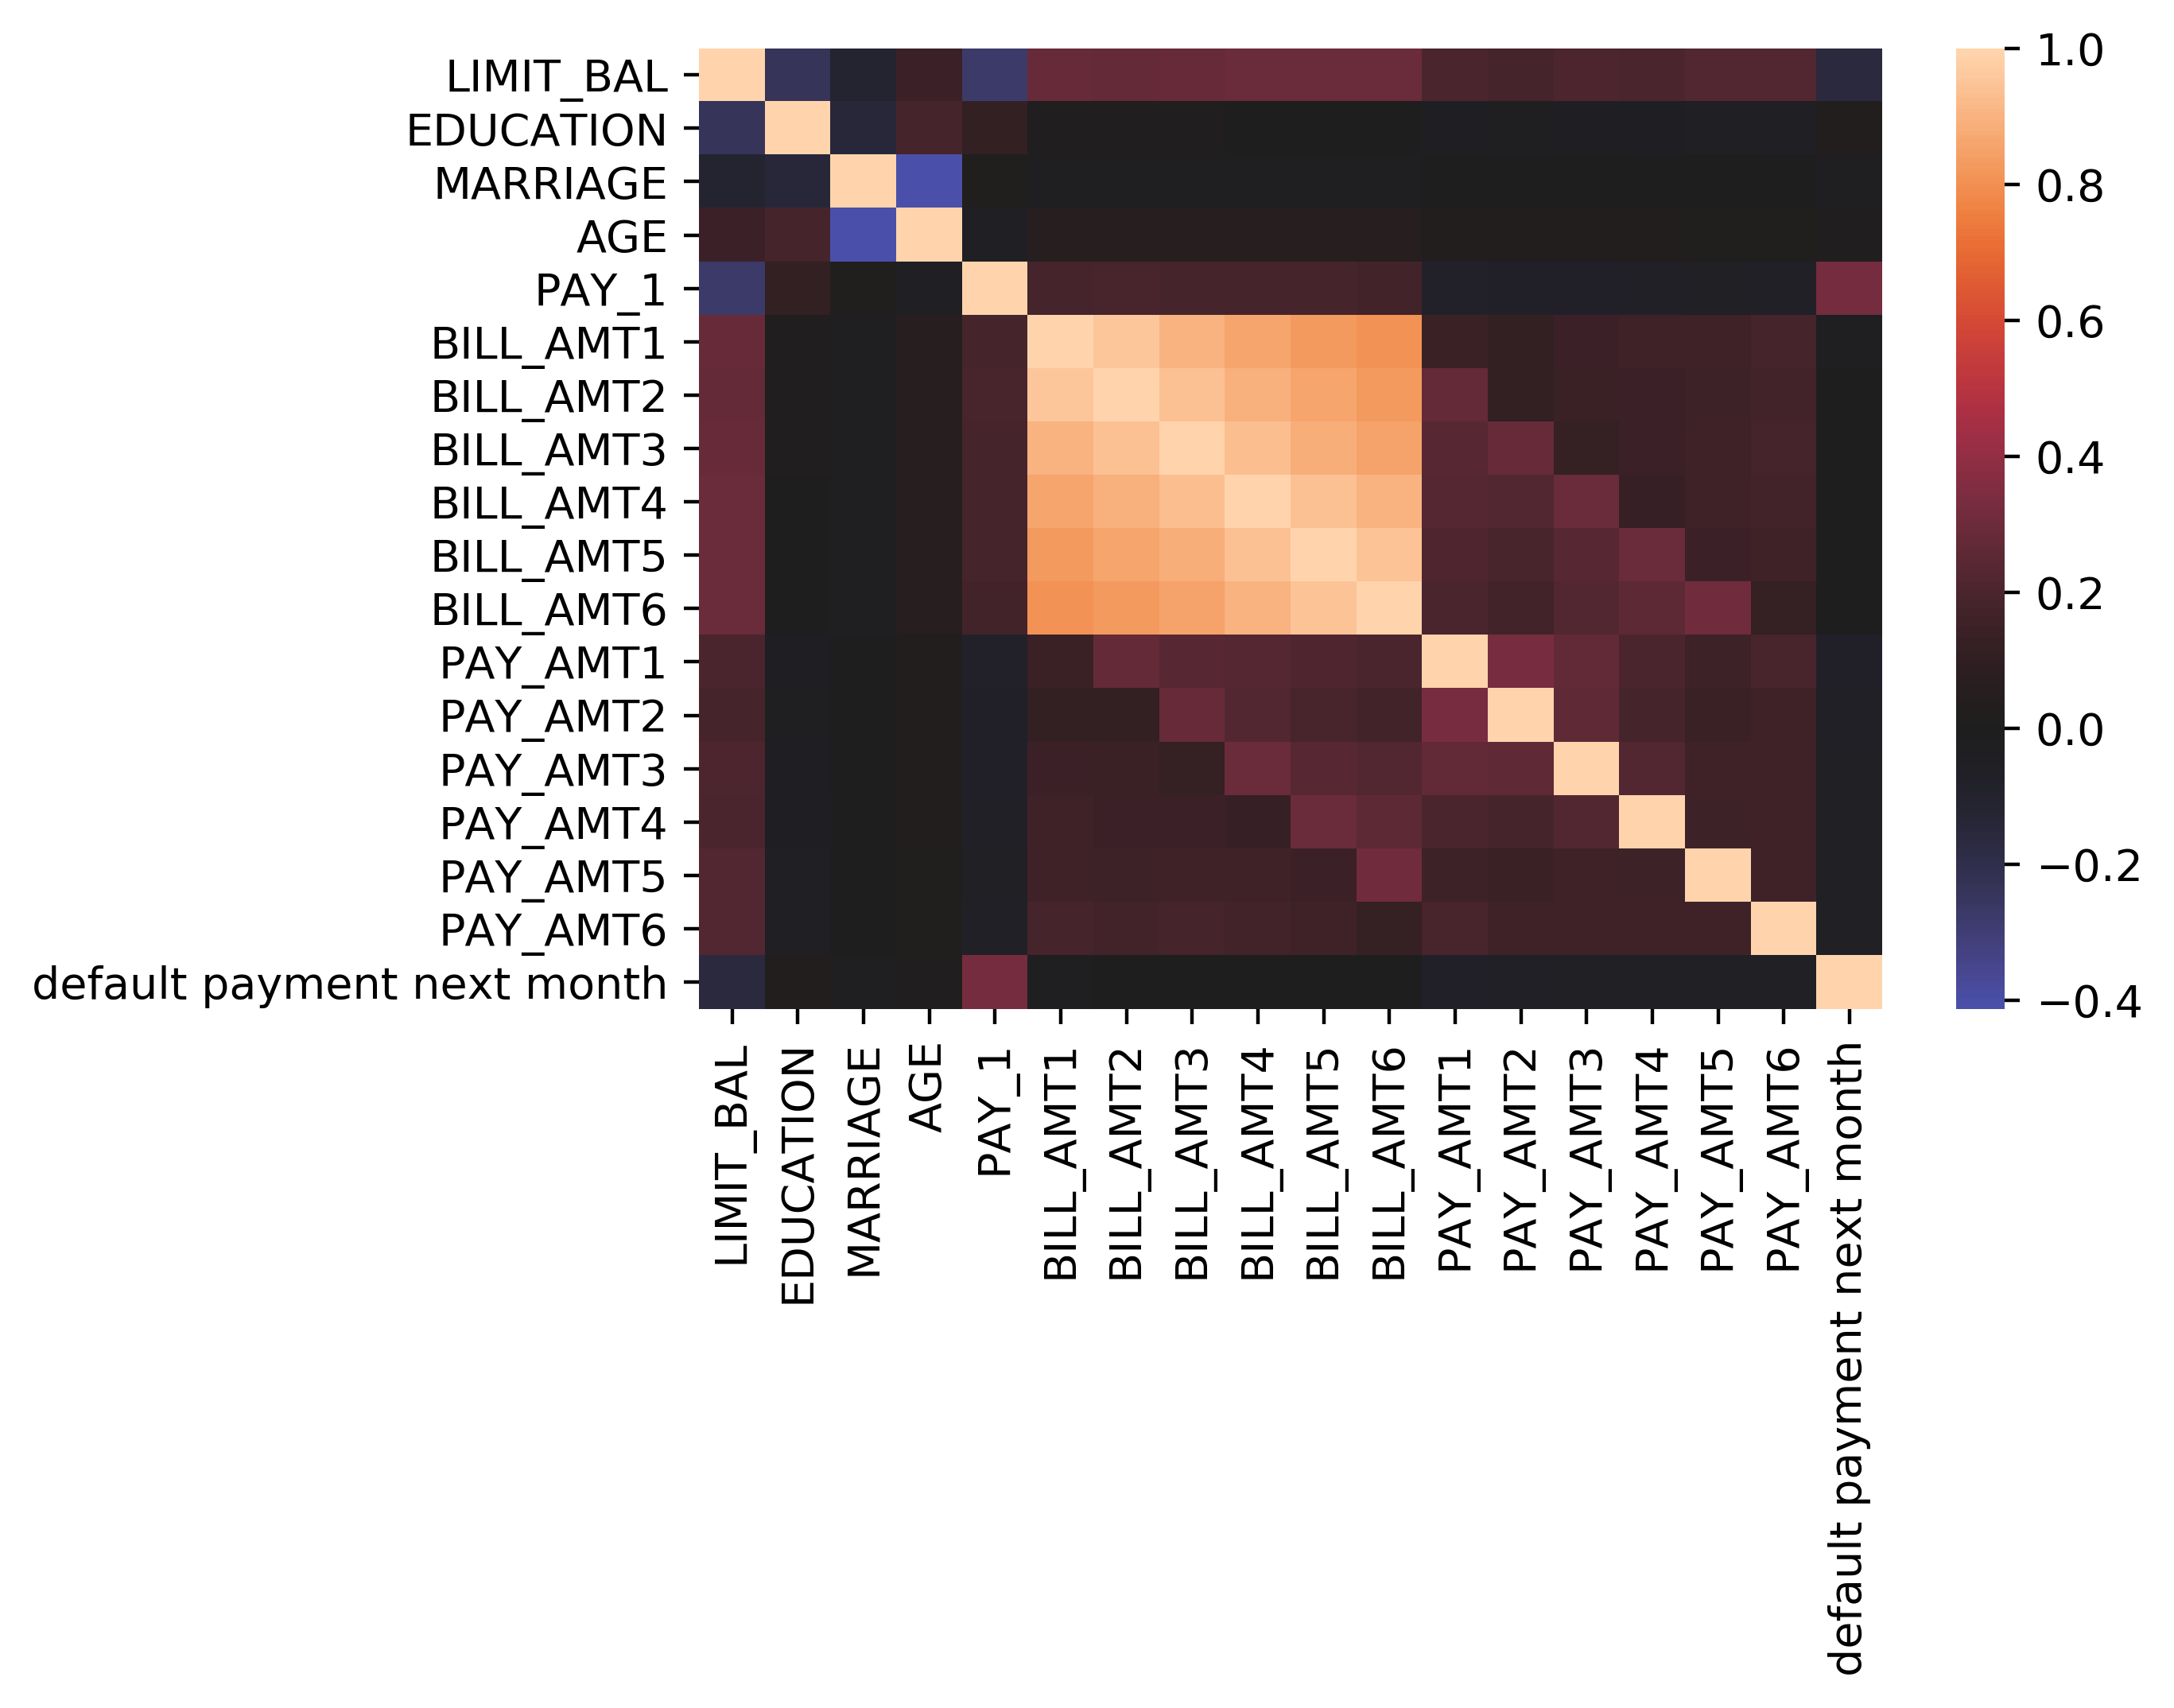

In [10]:
features_response=df.drop(columns=['ID', 'SEX', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6',
                   'EDUCATION_CAT', 'graduate school', 'high school','others', 'university'])
corr = features_response.corr()
mpl.rcParams['figure.dpi'] = 400 #high res figures
sns.heatmap(corr,xticklabels=corr.columns.values,yticklabels=corr.columns.values,center=0)

In [11]:
features=['LIMIT_BAL','EDUCATION','MARRIAGE', 'AGE','PAY_1','BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5',
          'BILL_AMT6','PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6']

In [12]:
features

['LIMIT_BAL',
 'EDUCATION',
 'MARRIAGE',
 'AGE',
 'PAY_1',
 'BILL_AMT1',
 'BILL_AMT2',
 'BILL_AMT3',
 'BILL_AMT4',
 'BILL_AMT5',
 'BILL_AMT6',
 'PAY_AMT1',
 'PAY_AMT2',
 'PAY_AMT3',
 'PAY_AMT4',
 'PAY_AMT5',
 'PAY_AMT6']

In [13]:
X = df[features].values

In [14]:
# Create features list
X.shape

(26664, 17)

_____________________________________________________
**Next, make a 80:20 train/test split using a random seed of 24.**

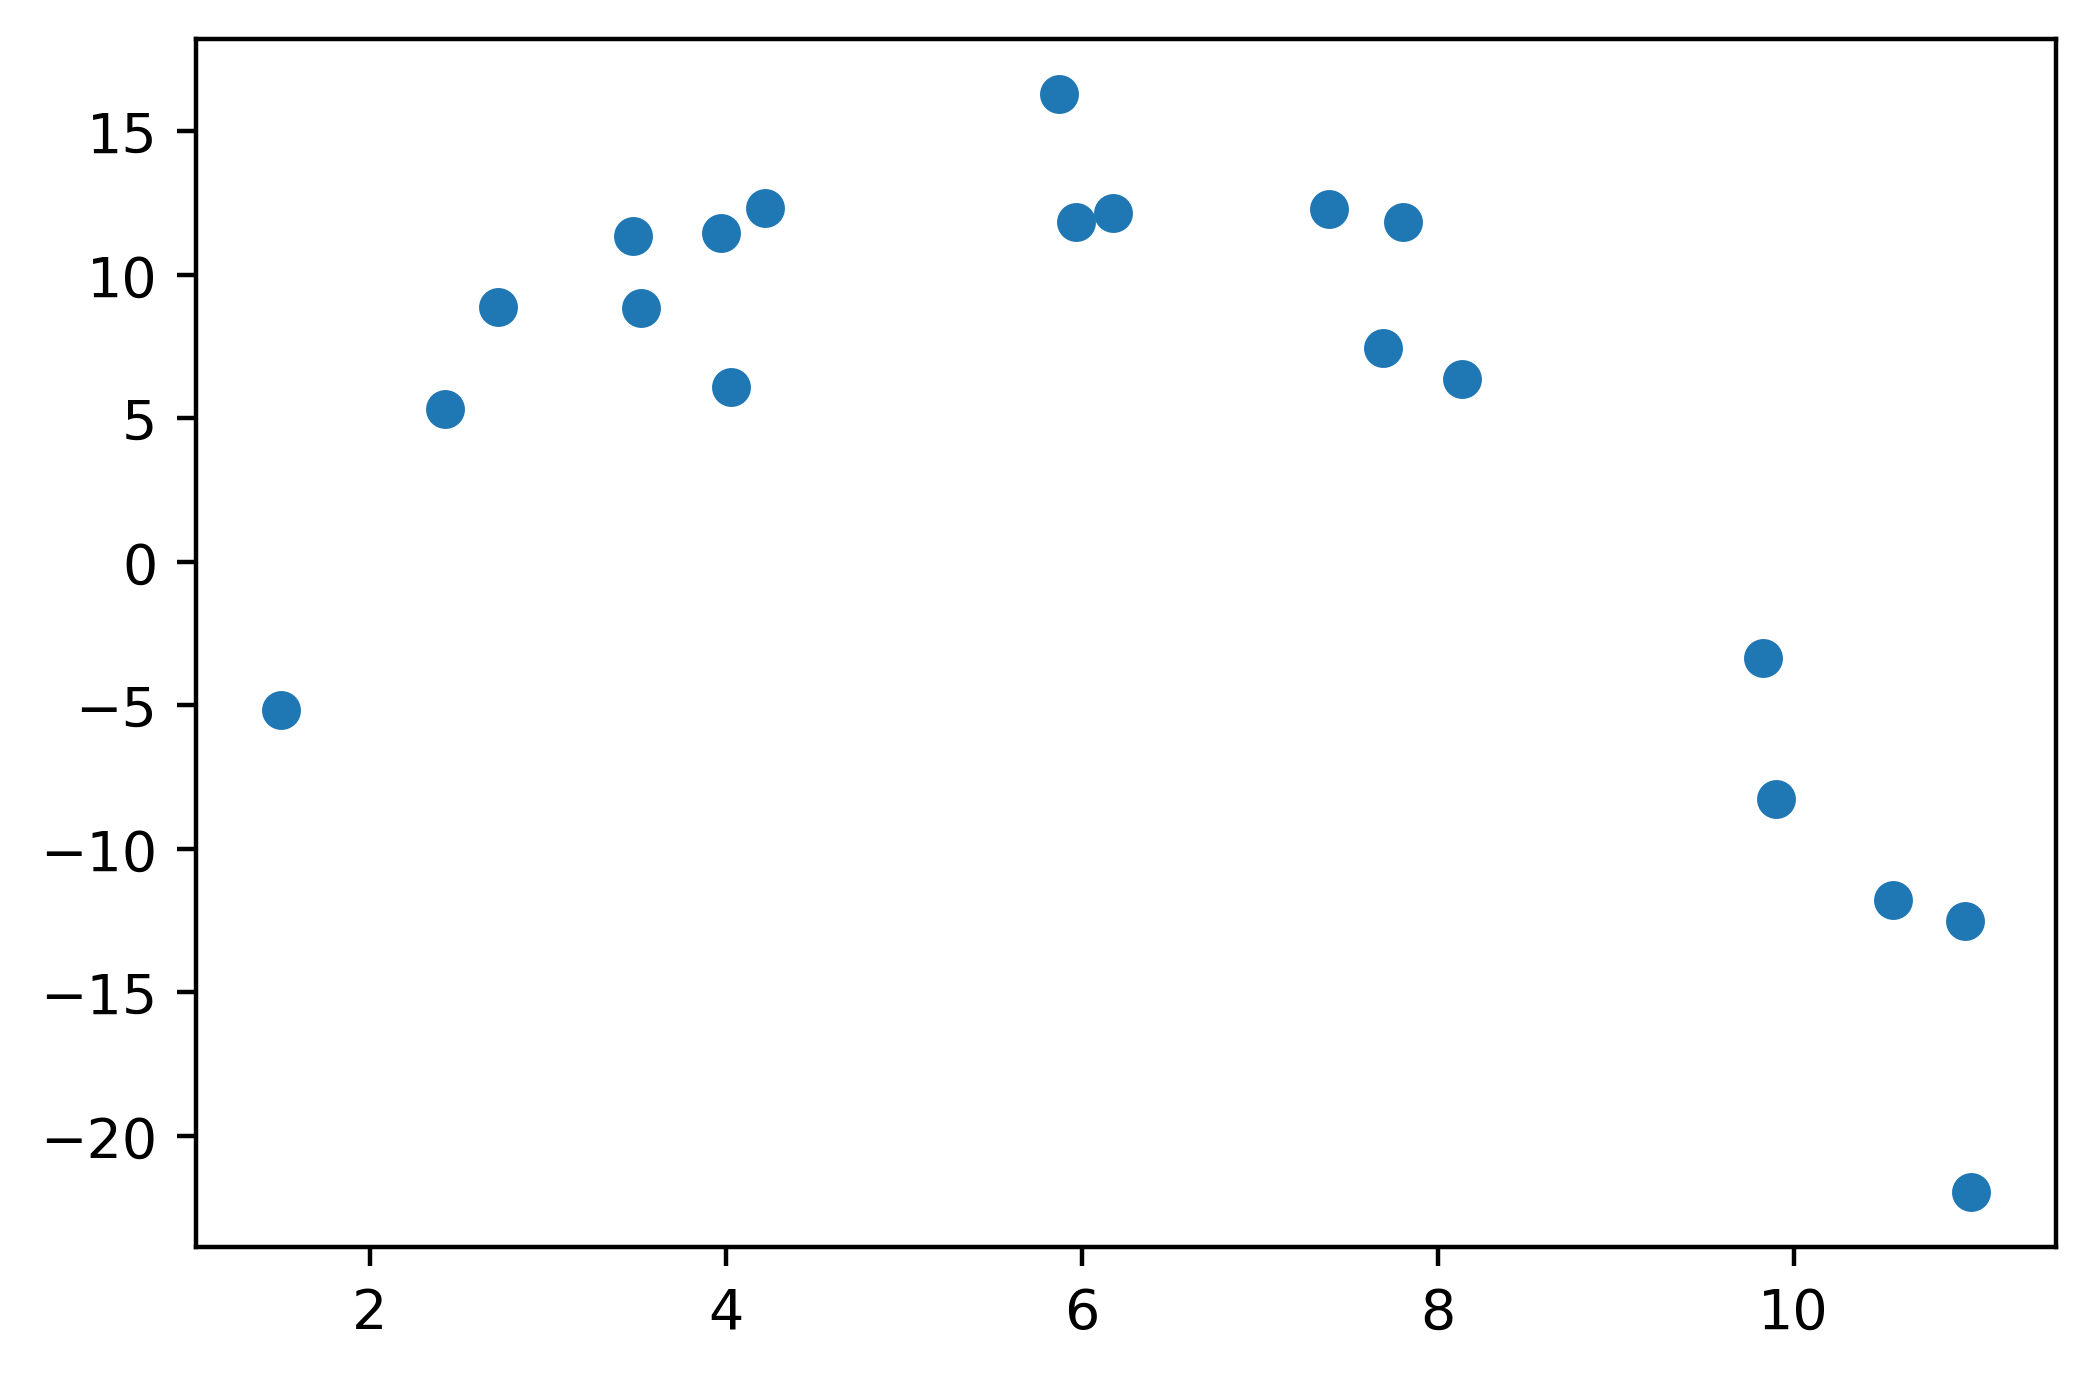

In [15]:
np.random.seed(seed=24)
n_points = 20
X = np.random.uniform(0, 11, n_points)
X = np.sort(X)
Y = (-X+2) * (X-9) + np.random.normal(0, 3, n_points)
plt.scatter(X, Y)

In [16]:
lin_fit = np.polyfit(X, Y, 1)
def poly_fun(X, p):
    Y = np.zeros_like(X)
    power = len(p)-1
    for coefficient in p:
        Y = Y + coefficient*X**power
        power = power - 1
    return Y

In [17]:
lin_fit
poly_fun(X,lin_fit)

array([14.00126015, 12.10293143, 11.4841204 ,  9.91465885,  9.81982947,
        8.89849112,  8.77670386,  8.37747558,  4.96515379,  4.77322616,
        4.3375423 ,  1.83566981,  1.20597142,  0.97551762,  0.28936351,
       -3.20185237, -3.35401434, -4.7148679 , -5.54305097, -5.62059007])

_____________________________________________________
**Then, instantiate the `MinMaxScaler` to scale the data.**

In [18]:
from sklearn.preprocessing import MinMaxScaler
min_max_sc = MinMaxScaler()

In [19]:
from sklearn.pipeline import Pipeline
scale_lr_pipeline = Pipeline(steps=[('scaler', min_max_sc)])

_____________________________________________________
**Next, instantiate a logistic regression model with the `saga` solver, L1 penalty, and set `max_iter` to 1,000 as we want the solver to have enough iterations to find a good solution.**

In [20]:
curve_x = np.linspace(0,11,333)
cmap = mpl.cm.get_cmap('tab10')
poly_features = X.reshape(20,-1)
plot_features = curve_x.reshape(333,-1)
for power in range (2,16):
    power_array = X.reshape(20,-1)**power
    poly_features = np.append(poly_features, power_array.reshape(20,-1), axis=1)
    plot_power_array = curve_x.reshape(333,-1)**power
    plot_features = np.append(plot_features, plot_power_array.reshape(333,-1), axis=1)

In [21]:
from sklearn.linear_model import Ridge
regressor = Ridge(alpha=0.001, fit_intercept=True, normalize=True,
                        copy_X=True, max_iter=1000, tol=0.001,
                        random_state=1)

In [22]:
regressor.fit(poly_features, Y)

Ridge(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=True, random_state=1, solver='auto', tol=0.001)

In [23]:
Y_pred = regressor.predict(plot_features)

(-20, 20)

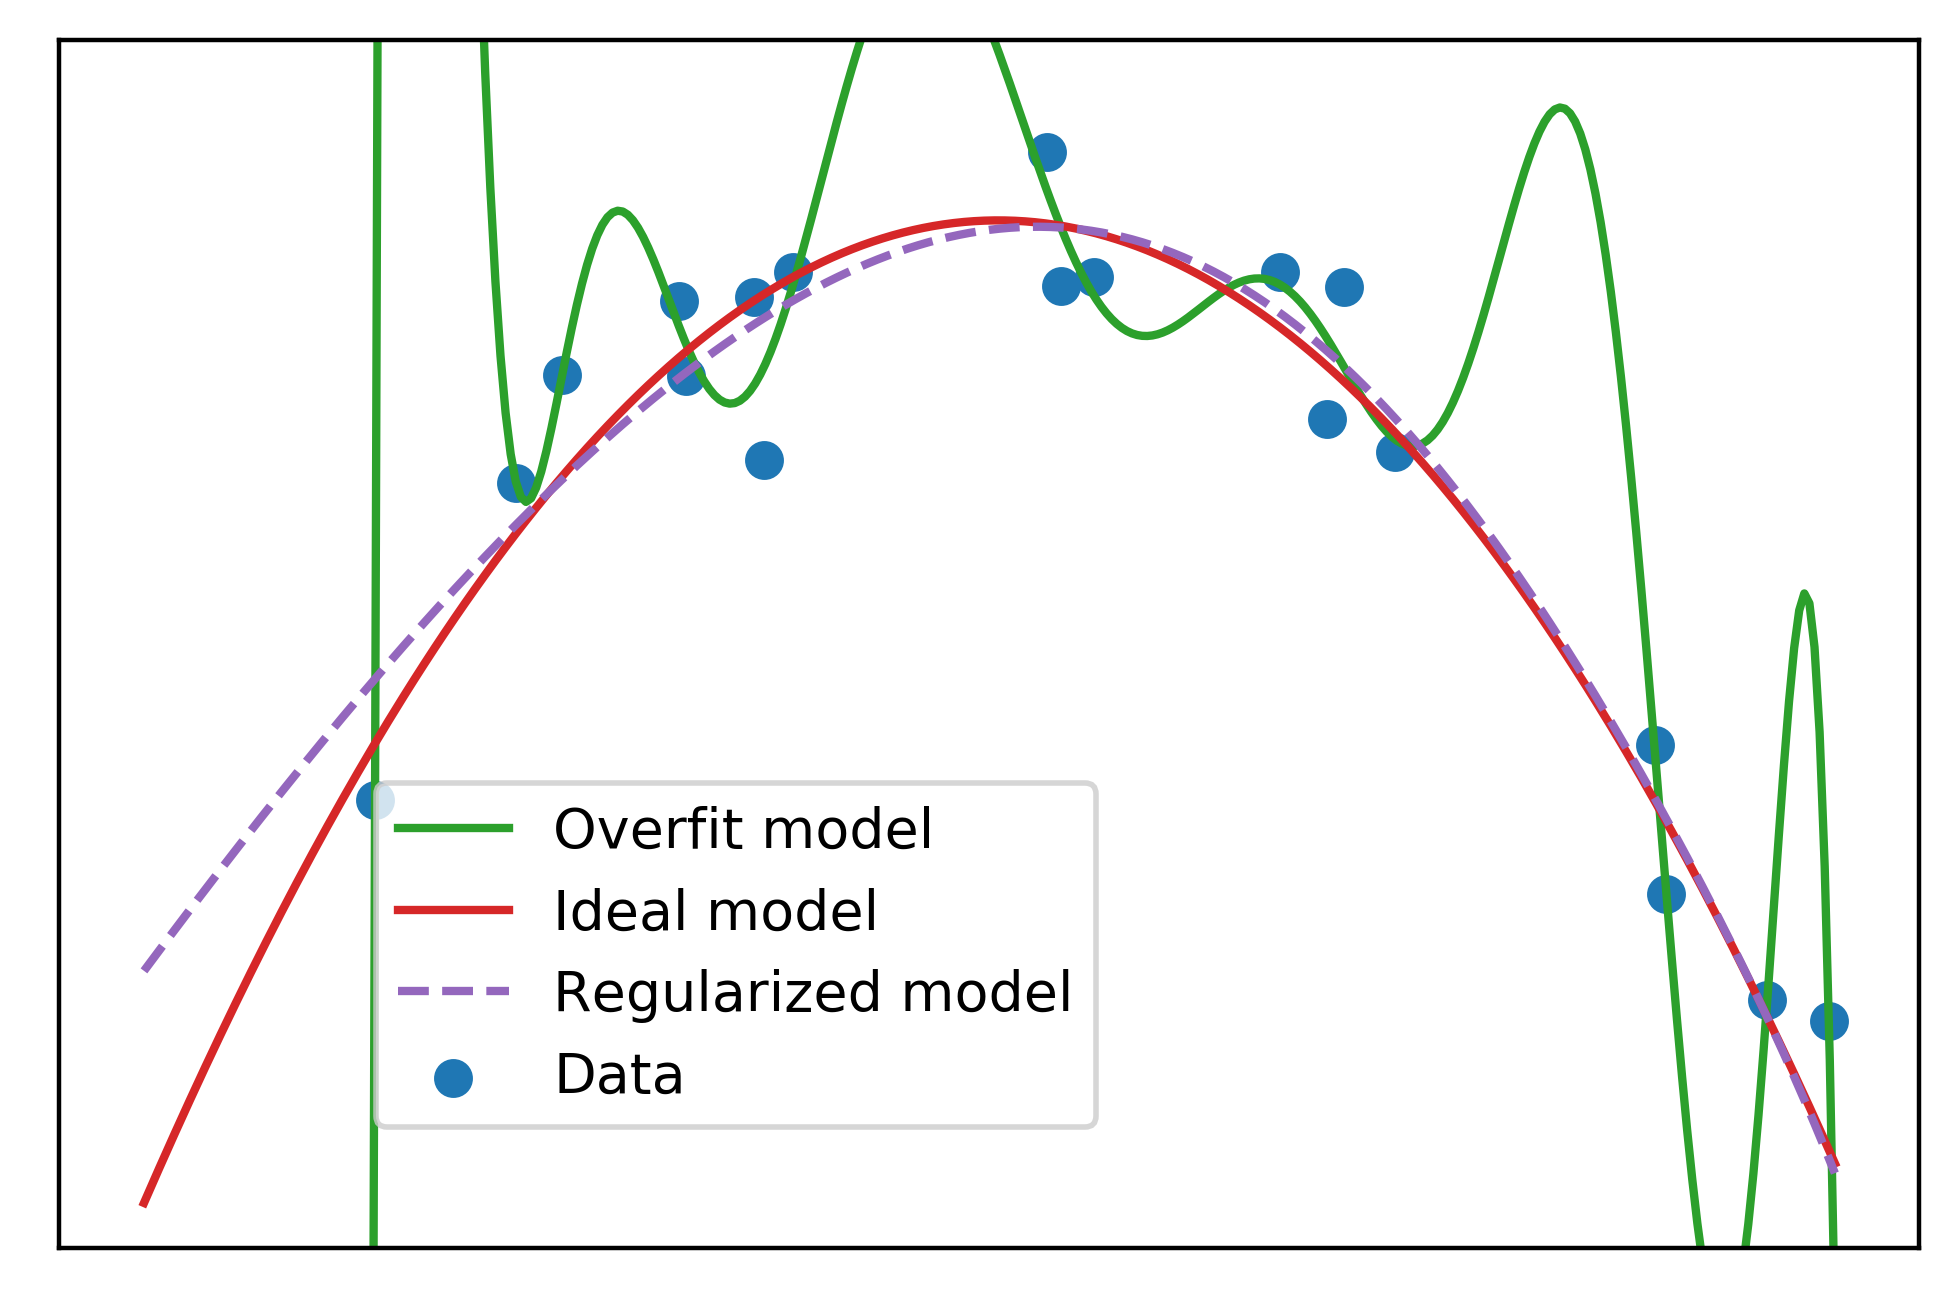

In [24]:
plt.scatter(X, Y, label='Data', color=cmap(0))
plt.plot(curve_x, poly_fun(curve_x,np.polyfit(X, Y, 15)), label='Overfit model', color=cmap(2))
plt.plot(curve_x, poly_fun(curve_x,np.polyfit(X, Y, 2)), label='Ideal model', color=cmap(3))
plt.plot(curve_x, Y_pred, label='Regularized model', color=cmap(4), linestyle='--')
plt.legend(loc=[0.17, 0.1])
plt.xticks([])
plt.yticks([])
plt.ylim([-20, 20])

_____________________________________________________
**Next, import the `Pipeline` class and create a `Pipeline` with the scaler and the logistic regression model, using the names `'scaler'` and `'model'` for the steps, respectively.**

In [25]:
from sklearn.pipeline import Pipeline

In [26]:
lr = LogisticRegression(solver='saga', penalty='l1', max_iter=1000)

In [27]:
scale_lr_pipeline = Pipeline(steps=[('scaler', min_max_sc), ('model', lr)])

_____________________________________________________
**Now, use the `get_params` method to view the parameters from each stage of the pipeline.**

In [28]:
# Use `get_params`
scale_lr_pipeline.get_params()

{'memory': None,
 'steps': [('scaler', MinMaxScaler(copy=True, feature_range=(0, 1))),
  ('model',
   LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                      intercept_scaling=1, l1_ratio=None, max_iter=1000,
                      multi_class='auto', n_jobs=None, penalty='l1',
                      random_state=None, solver='saga', tol=0.0001, verbose=0,
                      warm_start=False))],
 'verbose': False,
 'scaler': MinMaxScaler(copy=True, feature_range=(0, 1)),
 'model': LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                    intercept_scaling=1, l1_ratio=None, max_iter=1000,
                    multi_class='auto', n_jobs=None, penalty='l1',
                    random_state=None, solver='saga', tol=0.0001, verbose=0,
                    warm_start=False),
 'scaler__copy': True,
 'scaler__feature_range': (0, 1),
 'model__C': 1.0,
 'model__class_weight': None,
 'model__dual': False,
 'model__fi

**Use the `set_params` method to change the the `model__C` parameter to 2.**

In [29]:
# View what `model__C` is set to currently
scale_lr_pipeline.get_params()['model__C']

1.0

In [30]:
# Change `model__C` to 2
scale_lr_pipeline.set_params(model__C = 2)

Pipeline(memory=None,
         steps=[('scaler', MinMaxScaler(copy=True, feature_range=(0, 1))),
                ('model',
                 LogisticRegression(C=2, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=1000,
                                    multi_class='auto', n_jobs=None,
                                    penalty='l1', random_state=None,
                                    solver='saga', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)

_____________________________________________________
**Then, create a smaller range of C values to test with cross-validation, as these models will take longer to train and test with more data than our previous activities.**

**Use C_vals = [$10^2$, $10$, $1$, $10^{-1}$, $10^{-2}$, $10^{-3}$].**


<details>
    <summary>Hint:</summary>
    Recall that exponents in Python use the ** operator.
</details>

In [31]:
C_val_exponents = np.linspace(3,-3,13)
C_vals = np.float(10)**C_val_exponents

In [32]:
print(C_val_exponents,"\n",C_vals)

[ 3.   2.5  2.   1.5  1.   0.5  0.  -0.5 -1.  -1.5 -2.  -2.5 -3. ] 
 [1.00000000e+03 3.16227766e+02 1.00000000e+02 3.16227766e+01
 1.00000000e+01 3.16227766e+00 1.00000000e+00 3.16227766e-01
 1.00000000e-01 3.16227766e-02 1.00000000e-02 3.16227766e-03
 1.00000000e-03]


Now, define `k_folds` using `StratifiedKFold`. The number of folds should be 4. Set the random state to 1.

In [33]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold

In [34]:
n_folds = 4
k_folds = KFold(n_splits=n_folds, shuffle=False, random_state=1)

C:\Users\ankur\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


_____________________________________________________
**Next, make a new version of the `cross_val_C_search` function, called `cross_val_C_search_pipe`. Instead of the model argument, this function will take a pipeline argument. The changes inside the function will be to set the `C` value using `set_params(model__C = <value you want to test>)` on the pipeline, replacing the model with the pipeline for the fit and `predict_proba` methods, and accessing the `C` value using `pipeline.get_params()['model__C']` for the printed status update.**

In [35]:
from sklearn.metrics import roc_curve
def cross_val_C_search(k_folds, C_vals, model, X, Y):
        n_folds = k_folds.n_splits
        cv_train_roc_auc = np.empty((n_folds, len(C_vals)))
        cv_test_roc_auc = np.empty((n_folds, len(C_vals)))
        cv_test_roc = [[]]*len(C_vals)
        for c_val_counter in range(len(C_vals)):
            #Set the C value for the model object
              model.C = C_vals[c_val_counter]
              #Count folds for each value of C
              fold_counter = 0
              for train_index, test_index in k_folds.split(X, Y):
                  #Subset the features and response, for training and testing data for
                  #this fold
                  X_cv_train, X_cv_test = X[train_index], X[test_index]
                  y_cv_train, y_cv_test = Y[train_index], Y[test_index]
                  #Fit the model on the training data
                  model.fit(X_cv_train, y_cv_train)
                  #Get the training ROC AUC
                  y_cv_train_predict_proba = model.predict_proba(X_cv_train)
                  cv_train_roc_auc[fold_counter, c_val_counter] = \
                  roc_auc_score(y_cv_train, y_cv_train_predict_proba[:,1])
                  #Get the testing ROC AUC
                  y_cv_test_predict_proba = model.predict_proba(X_cv_test)
                  cv_test_roc_auc[fold_counter, c_val_counter] = \
                  roc_auc_score(y_cv_test, y_cv_test_predict_proba[:,1])
                  #Testing ROC curves for each fold
                  this_fold_roc = roc_curve(y_cv_test, y_cv_test_predict_proba[:,1])
                  cv_test_roc[c_val_counter].append(this_fold_roc)
                  #Increment the fold counter
                  fold_counter += 1
              #Indicate progress
              print('Done with C = {}'.format(lr_syn.C))
                
        return cv_train_roc_auc, cv_test_roc_auc, cv_test_roc  

_____________________________________________________
**Now, run this function as in the previous activity, but using the new range of `C` values, the pipeline you created, and the features and response variable from the training split of the case study data.**

    You may see warnings here, or in later steps, about the non-convergence of the solver; you could experiment with the `tol` or `max_iter`` options to try and achieve convergence, although the results you obtain with `max_iter = 1000` are likely to be sufficient.

In [36]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

In [37]:
X_synthetic, y_synthetic = make_classification(
    n_samples=1000, n_features=200,
    n_informative=3, n_redundant=10,
    n_repeated=0, n_classes=2,
    n_clusters_per_class=2, weights=None,
    flip_y=0.01, class_sep=0.8,
    hypercube=True, shift=0.0,
    scale=1.0, shuffle=True,
    random_state=24
)

In [38]:
print(X_synthetic.shape, y_synthetic.shape)

(1000, 200) (1000,)


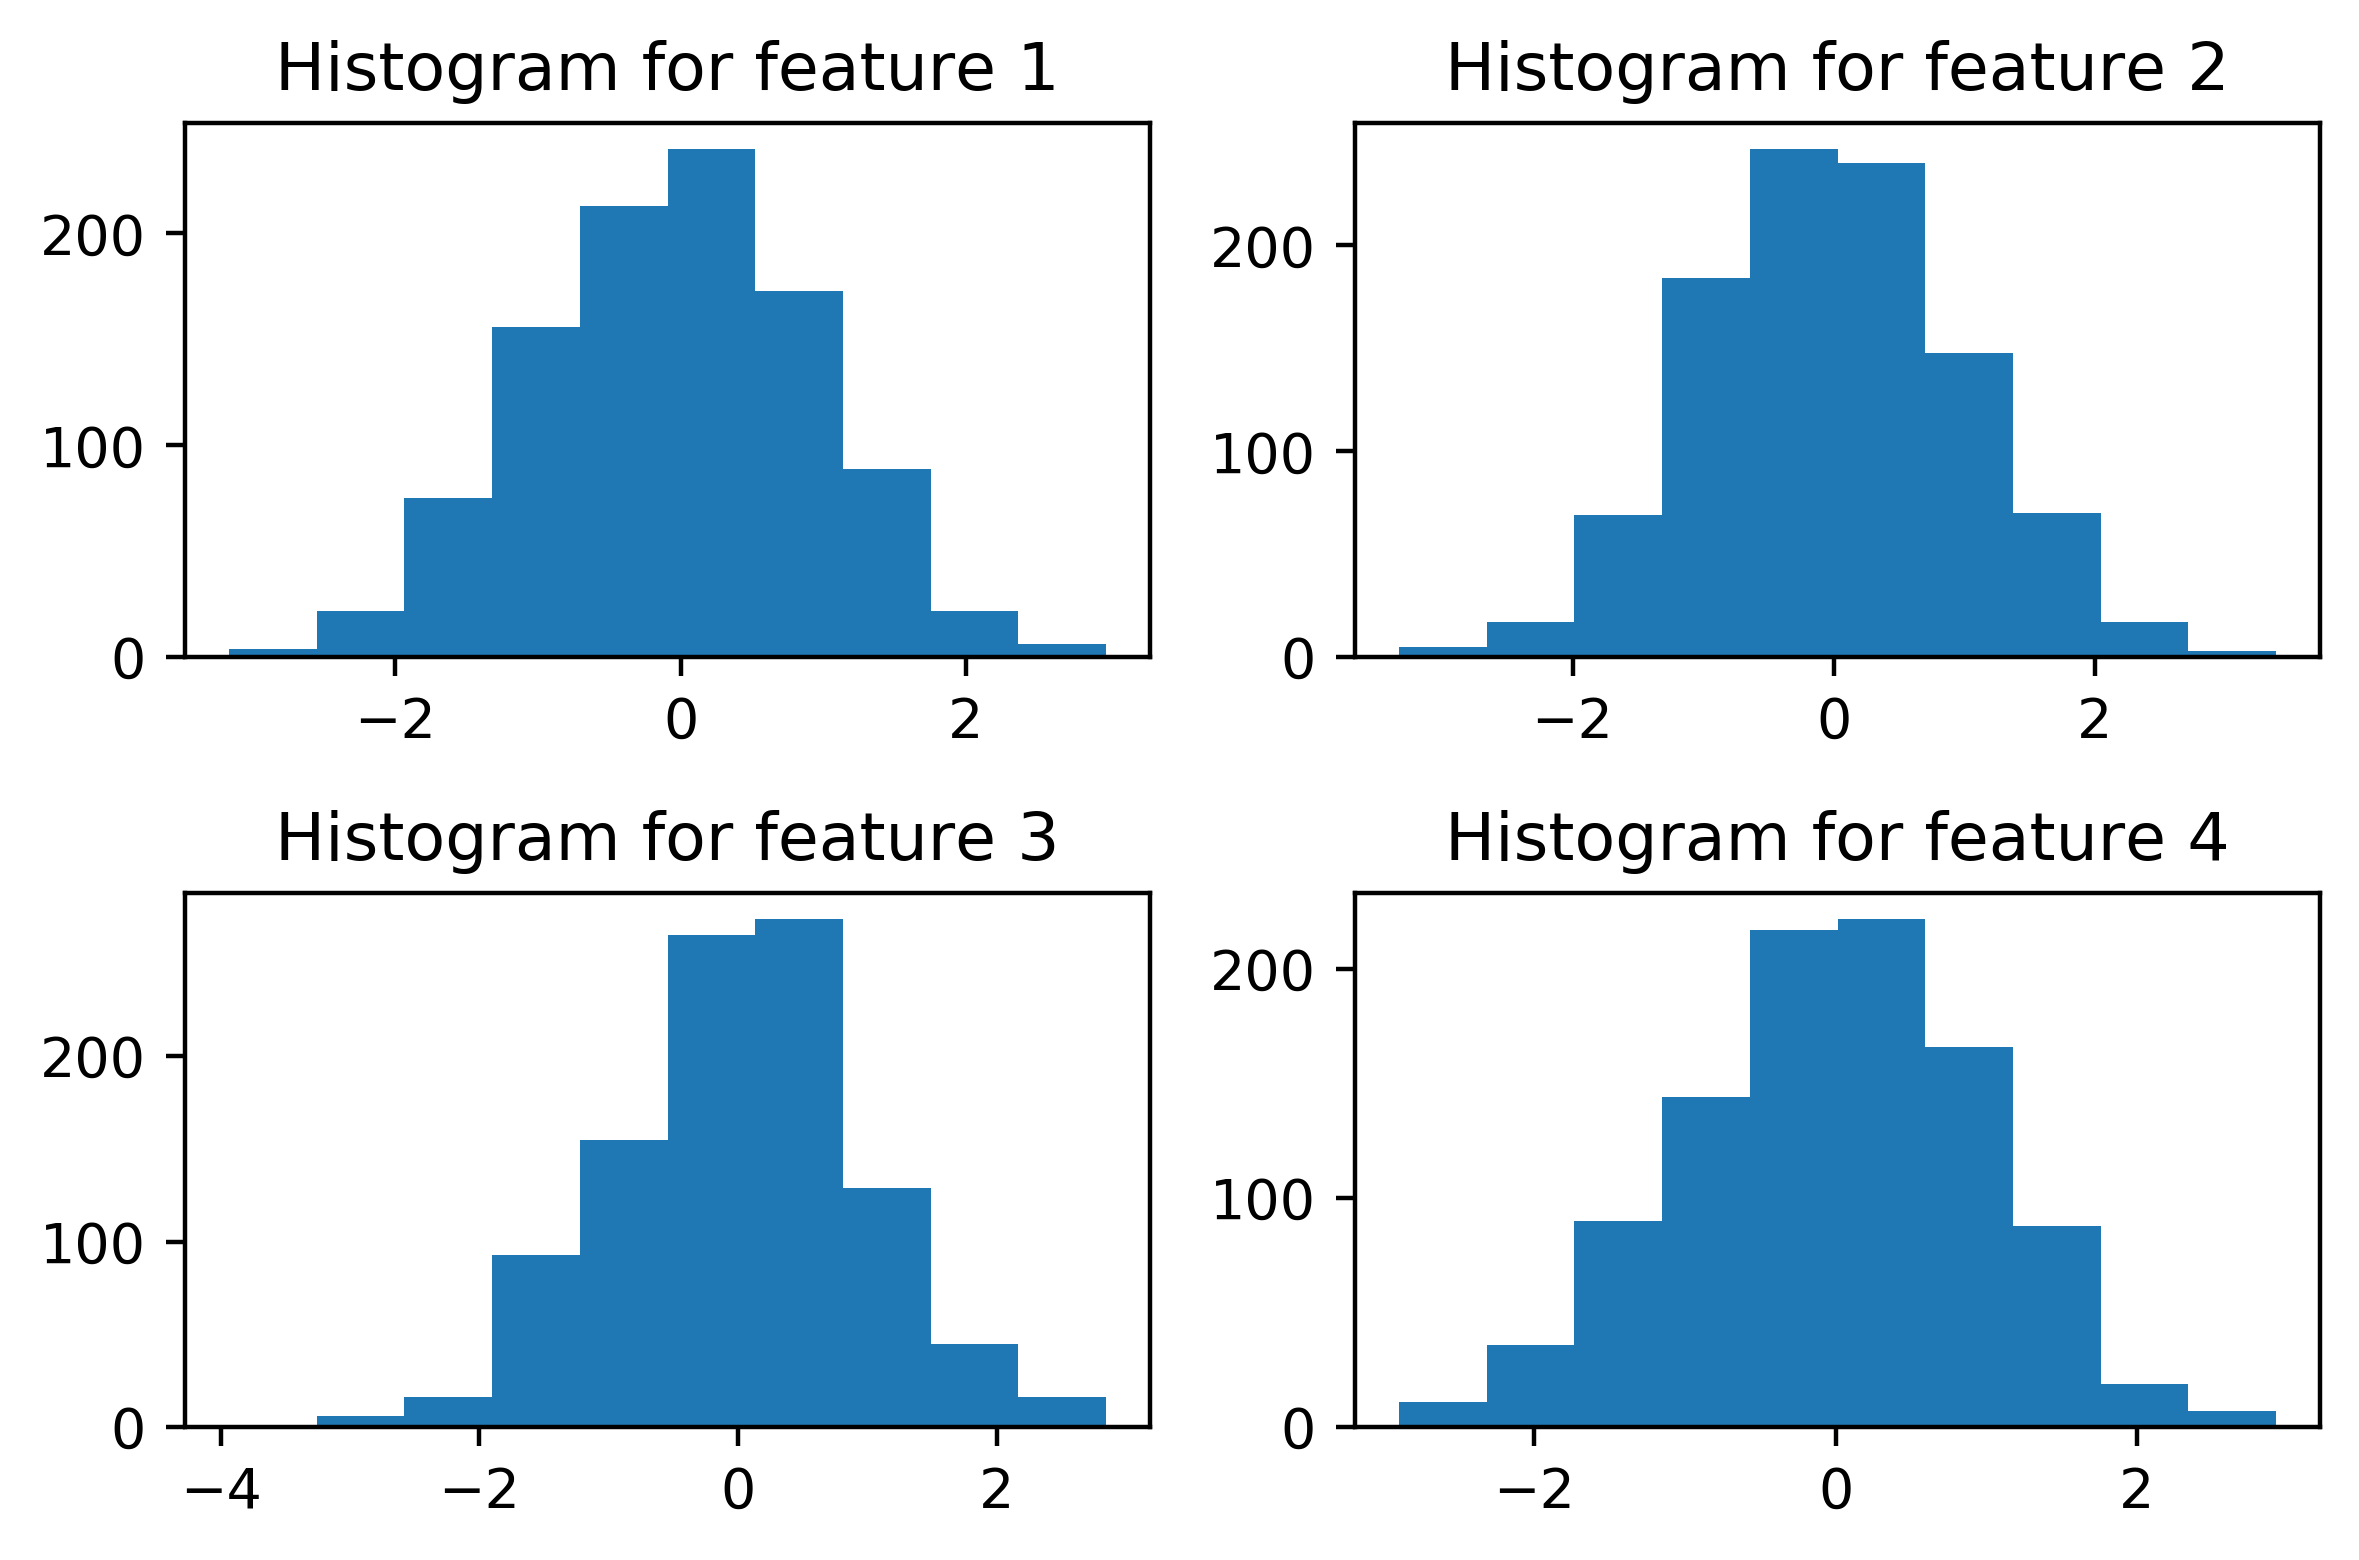

In [39]:
for plot_index in range(4):
     plt.subplot(2,2,plot_index+1)
     plt.hist(X_synthetic[:,plot_index])
     plt.title('Histogram for feature {}'.format(plot_index+1))
plt.tight_layout()

In [40]:
X_syn_train, X_syn_test, y_syn_train, y_syn_test = train_test_split(
    X_synthetic, y_synthetic,
    test_size=0.2, random_state=24
)
lr_syn = LogisticRegression(solver='liblinear', penalty='l1', C=1000, random_state=1)
lr_syn.fit(X_syn_train, y_syn_train)

LogisticRegression(C=1000, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l1',
                   random_state=1, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [41]:
lr_syn.fit(X_syn_train, y_syn_train)

LogisticRegression(C=1000, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l1',
                   random_state=1, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [42]:
y_syn_train_predict_proba = lr_syn.predict_proba(X_syn_train)
roc_auc_score(y_syn_train, y_syn_train_predict_proba[:,1])

0.9419937500000001

In [43]:
y_syn_test_predict_proba = lr_syn.predict_proba(X_syn_test)
roc_auc_score(y_syn_test, y_syn_test_predict_proba[:,1])

0.8074807480748075

In [44]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold

In [45]:
n_folds = 4
k_folds = KFold(n_splits=n_folds, shuffle=False, random_state=1)

C:\Users\ankur\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


In [46]:
def plot_kfolds(k_folds_iterator):
    fold_counter = 0
    for train_index, test_index in k_folds_iterator.split(X_syn_train, y_syn_train):
 
        #Axis to hold the plot of this fold
        ax = plt.subplot(n_folds,1,fold_counter+1)
 
        #Background rectangle representing all samples
        n_train_samples = len(y_syn_train)
        rect = mpl.patches.Rectangle(xy=(0,0), width=n_train_samples, height=1)
        ax.add_patch(rect)
 
        #Plot each testing sample from this fold as a vertical line
        for this_text_ix in test_index:
            ax.plot([this_text_ix, this_text_ix], [0, 1], color='orange',
                    linewidth=0.75)
 
        #Plot formatting
        ax.set_xticks([])
        ax.set_yticks([])
        ax.set_xlim(0, n_train_samples)
        ax.set_ylim(0,1)
 
        #Subplot titles
        if fold_counter == 0:
            ax.text(0.26, 1.2, 'Training data,',
                    transform=ax.transAxes, backgroundcolor = 'blue')
            ax.text(0.45, 1.2, 'testing data:',
                    transform=ax.transAxes, backgroundcolor = 'orange')
            ax.text(0.62, 1.2, 'fold {}'.format(fold_counter+1), transform=ax.transAxes)
        else:
            ax.text(0.45, 1.2, 'Fold {}'.format(fold_counter+1), transform=ax.transAxes)
 
        fold_counter += 1
 
    plt.tight_layout()

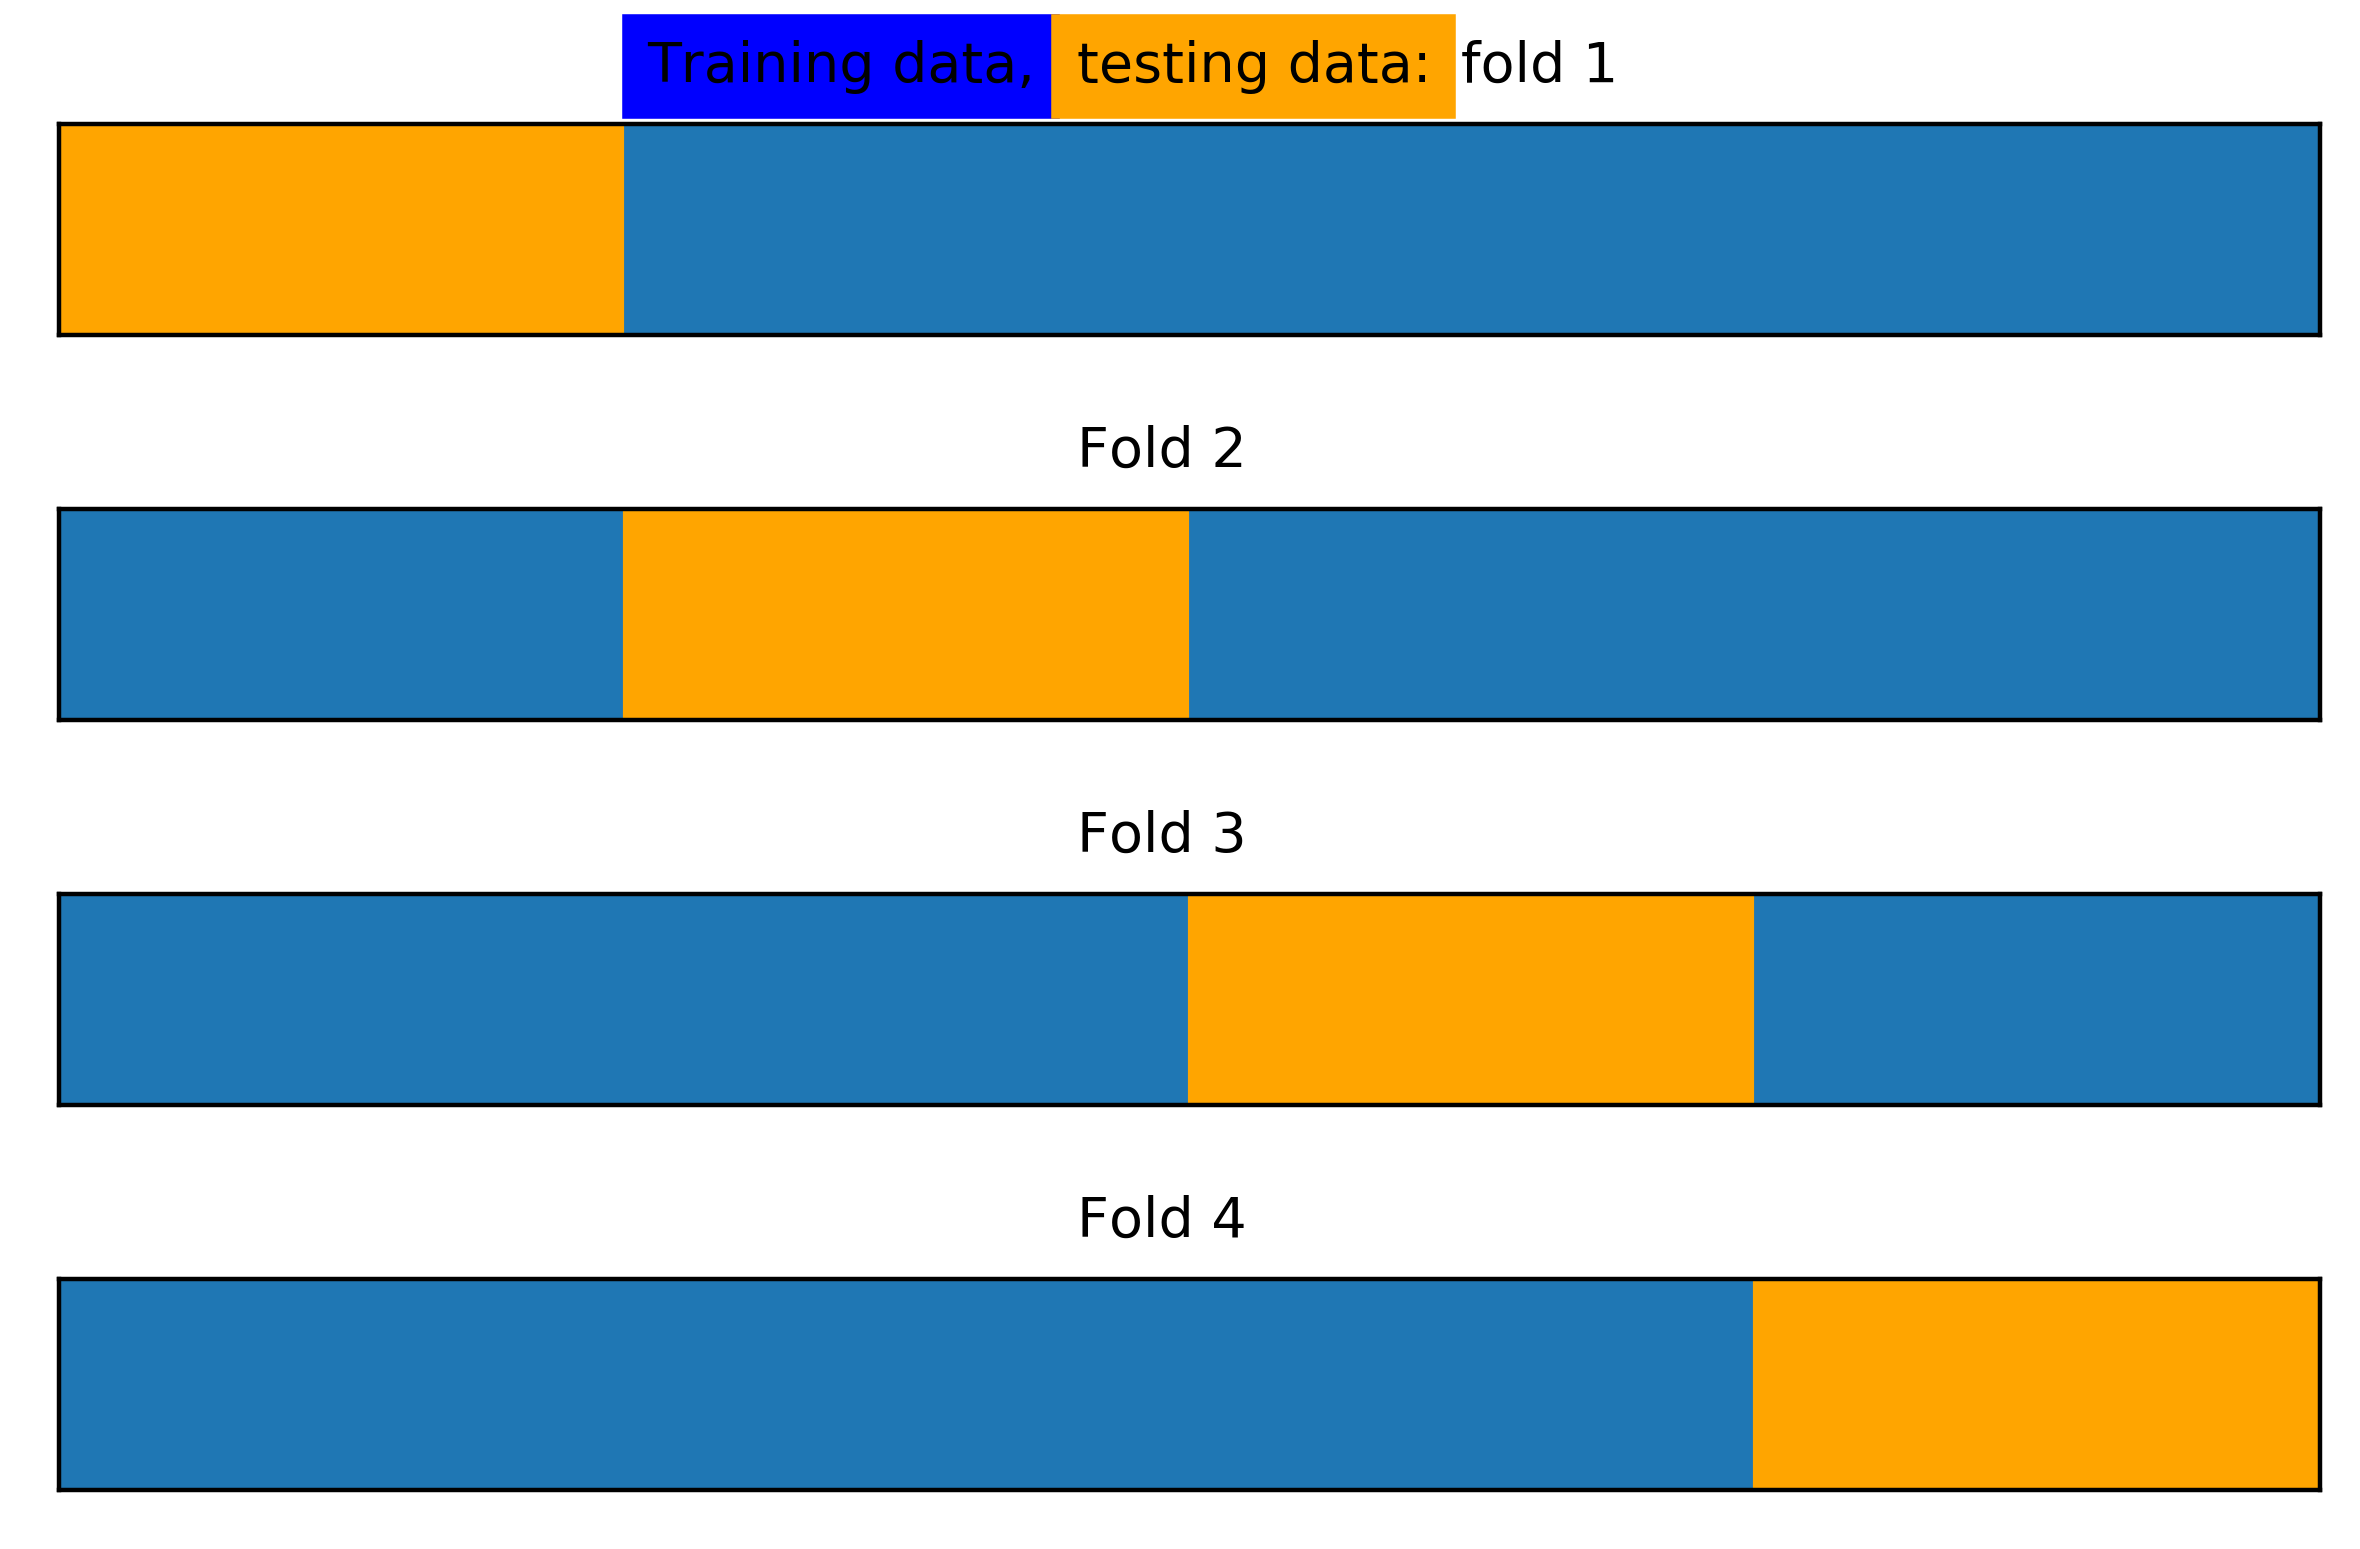

In [47]:
plot_kfolds(k_folds)

C:\Users\ankur\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


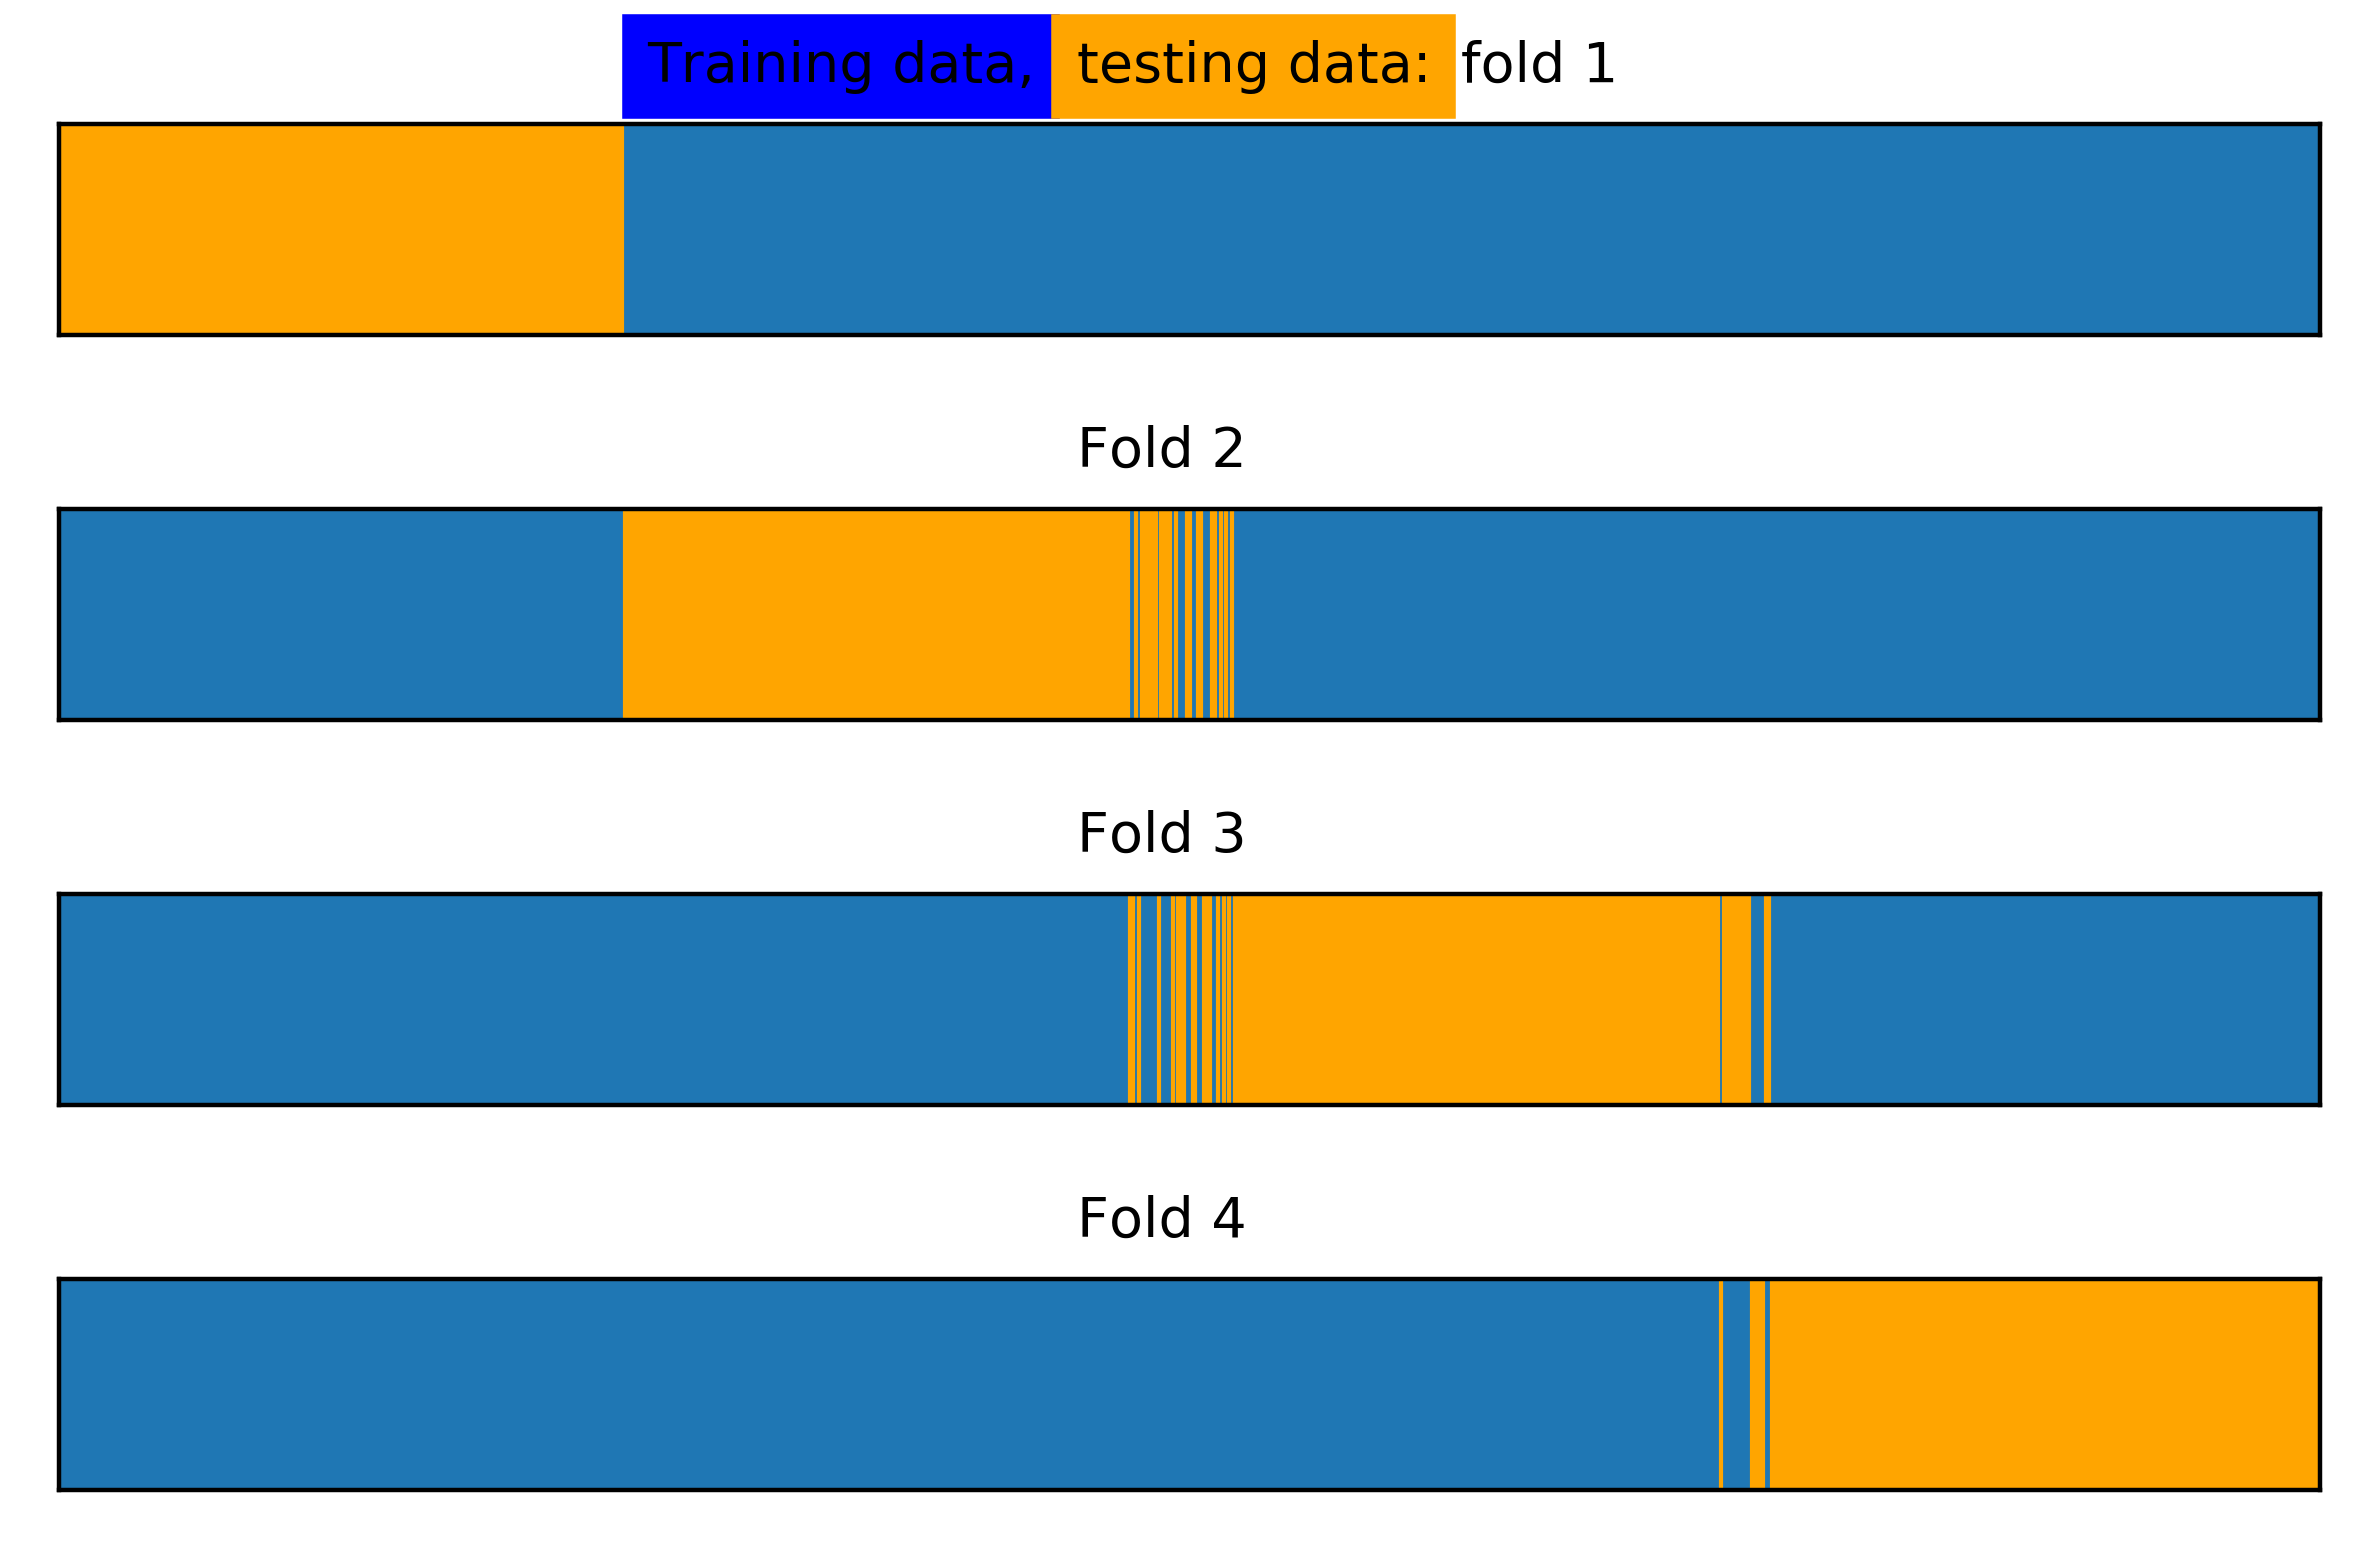

In [48]:
k_folds = StratifiedKFold(n_splits=n_folds, shuffle=False, random_state=1)
plot_kfolds(k_folds)

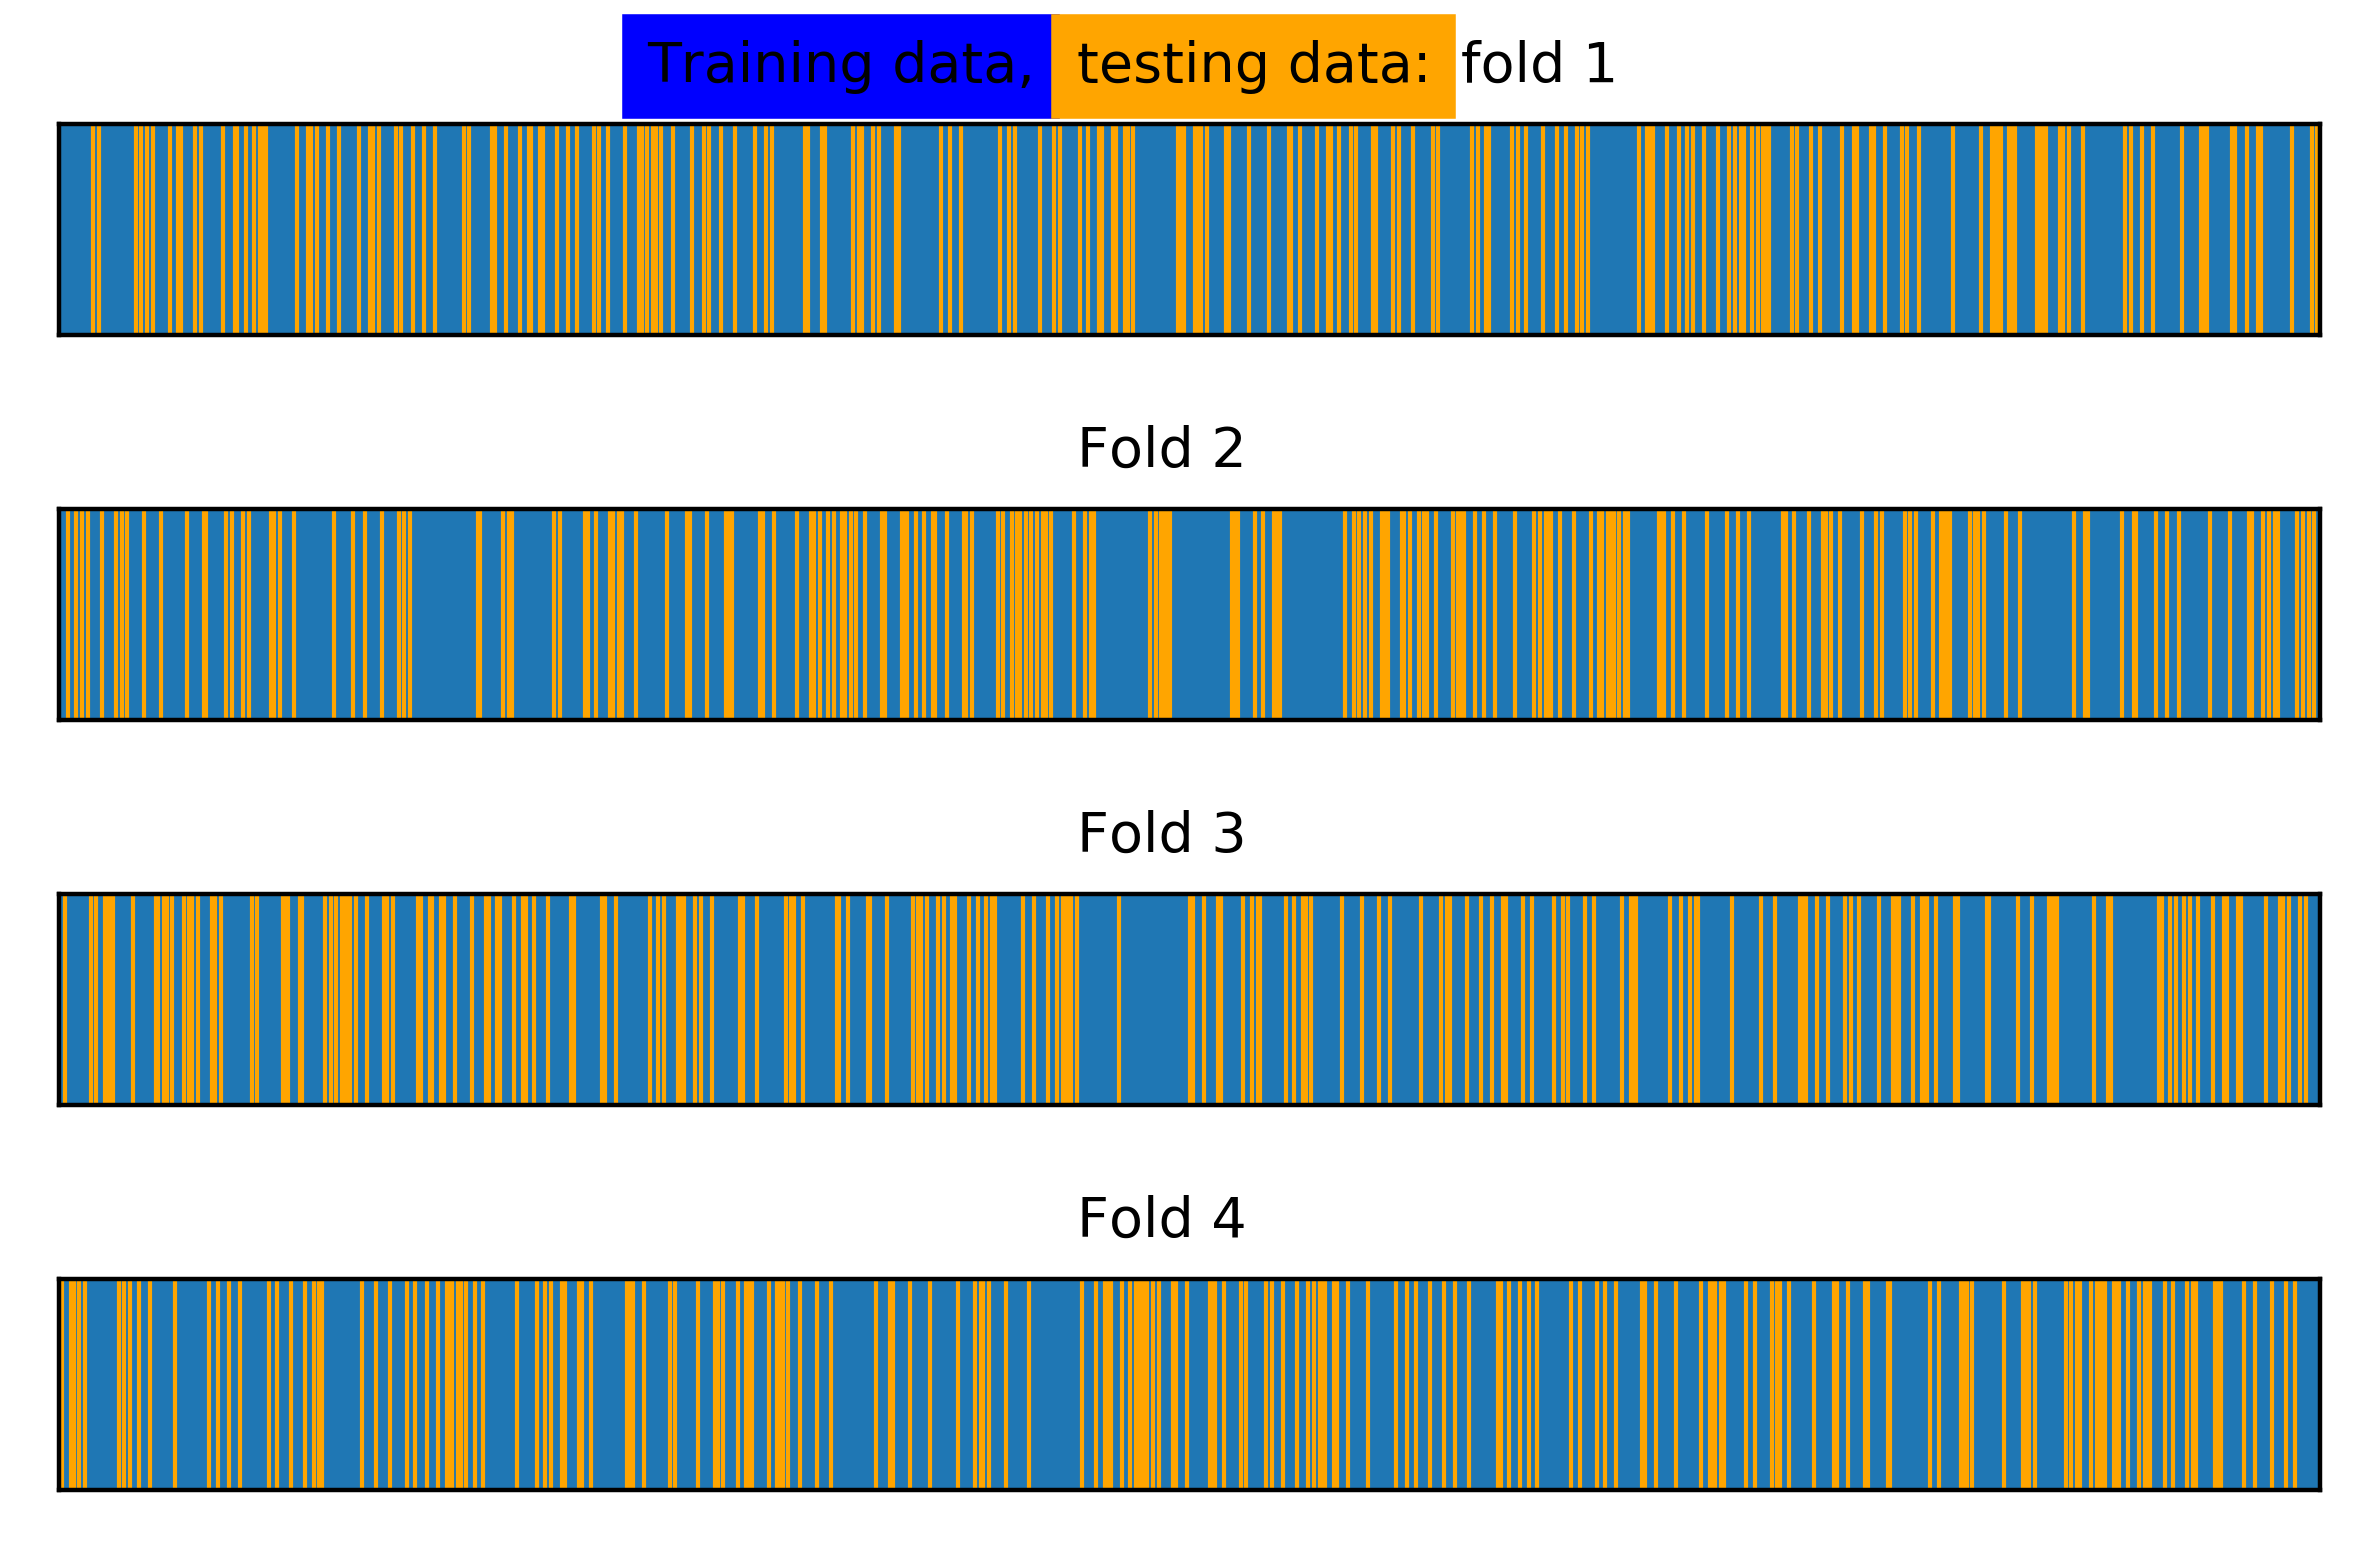

In [49]:
k_folds = StratifiedKFold(n_splits=n_folds, shuffle=True, random_state=1)
plot_kfolds(k_folds)

In [50]:
cv_train_roc_auc, cv_test_roc_auc, cv_test_roc = \
cross_val_C_search(k_folds, C_vals, lr_syn, X_syn_train, y_syn_train)

Done with C = 1000.0
Done with C = 316.22776601683796
Done with C = 100.0
Done with C = 31.622776601683793
Done with C = 10.0
Done with C = 3.1622776601683795
Done with C = 1.0
Done with C = 0.31622776601683794
Done with C = 0.1
Done with C = 0.03162277660168379
Done with C = 0.01
Done with C = 0.0031622776601683794
Done with C = 0.001


_____________________________________________________
**Plot the average training and testing ROC AUC across folds, for each `np.log(C_vals)` value.**

In [51]:
C_logVal=np.log(C_vals)
C_logVal

array([ 6.90775528,  5.75646273,  4.60517019,  3.45387764,  2.30258509,
        1.15129255,  0.        , -1.15129255, -2.30258509, -3.45387764,
       -4.60517019, -5.75646273, -6.90775528])

Text(0.5, 1.0, 'Cross validation on Case Study problem')

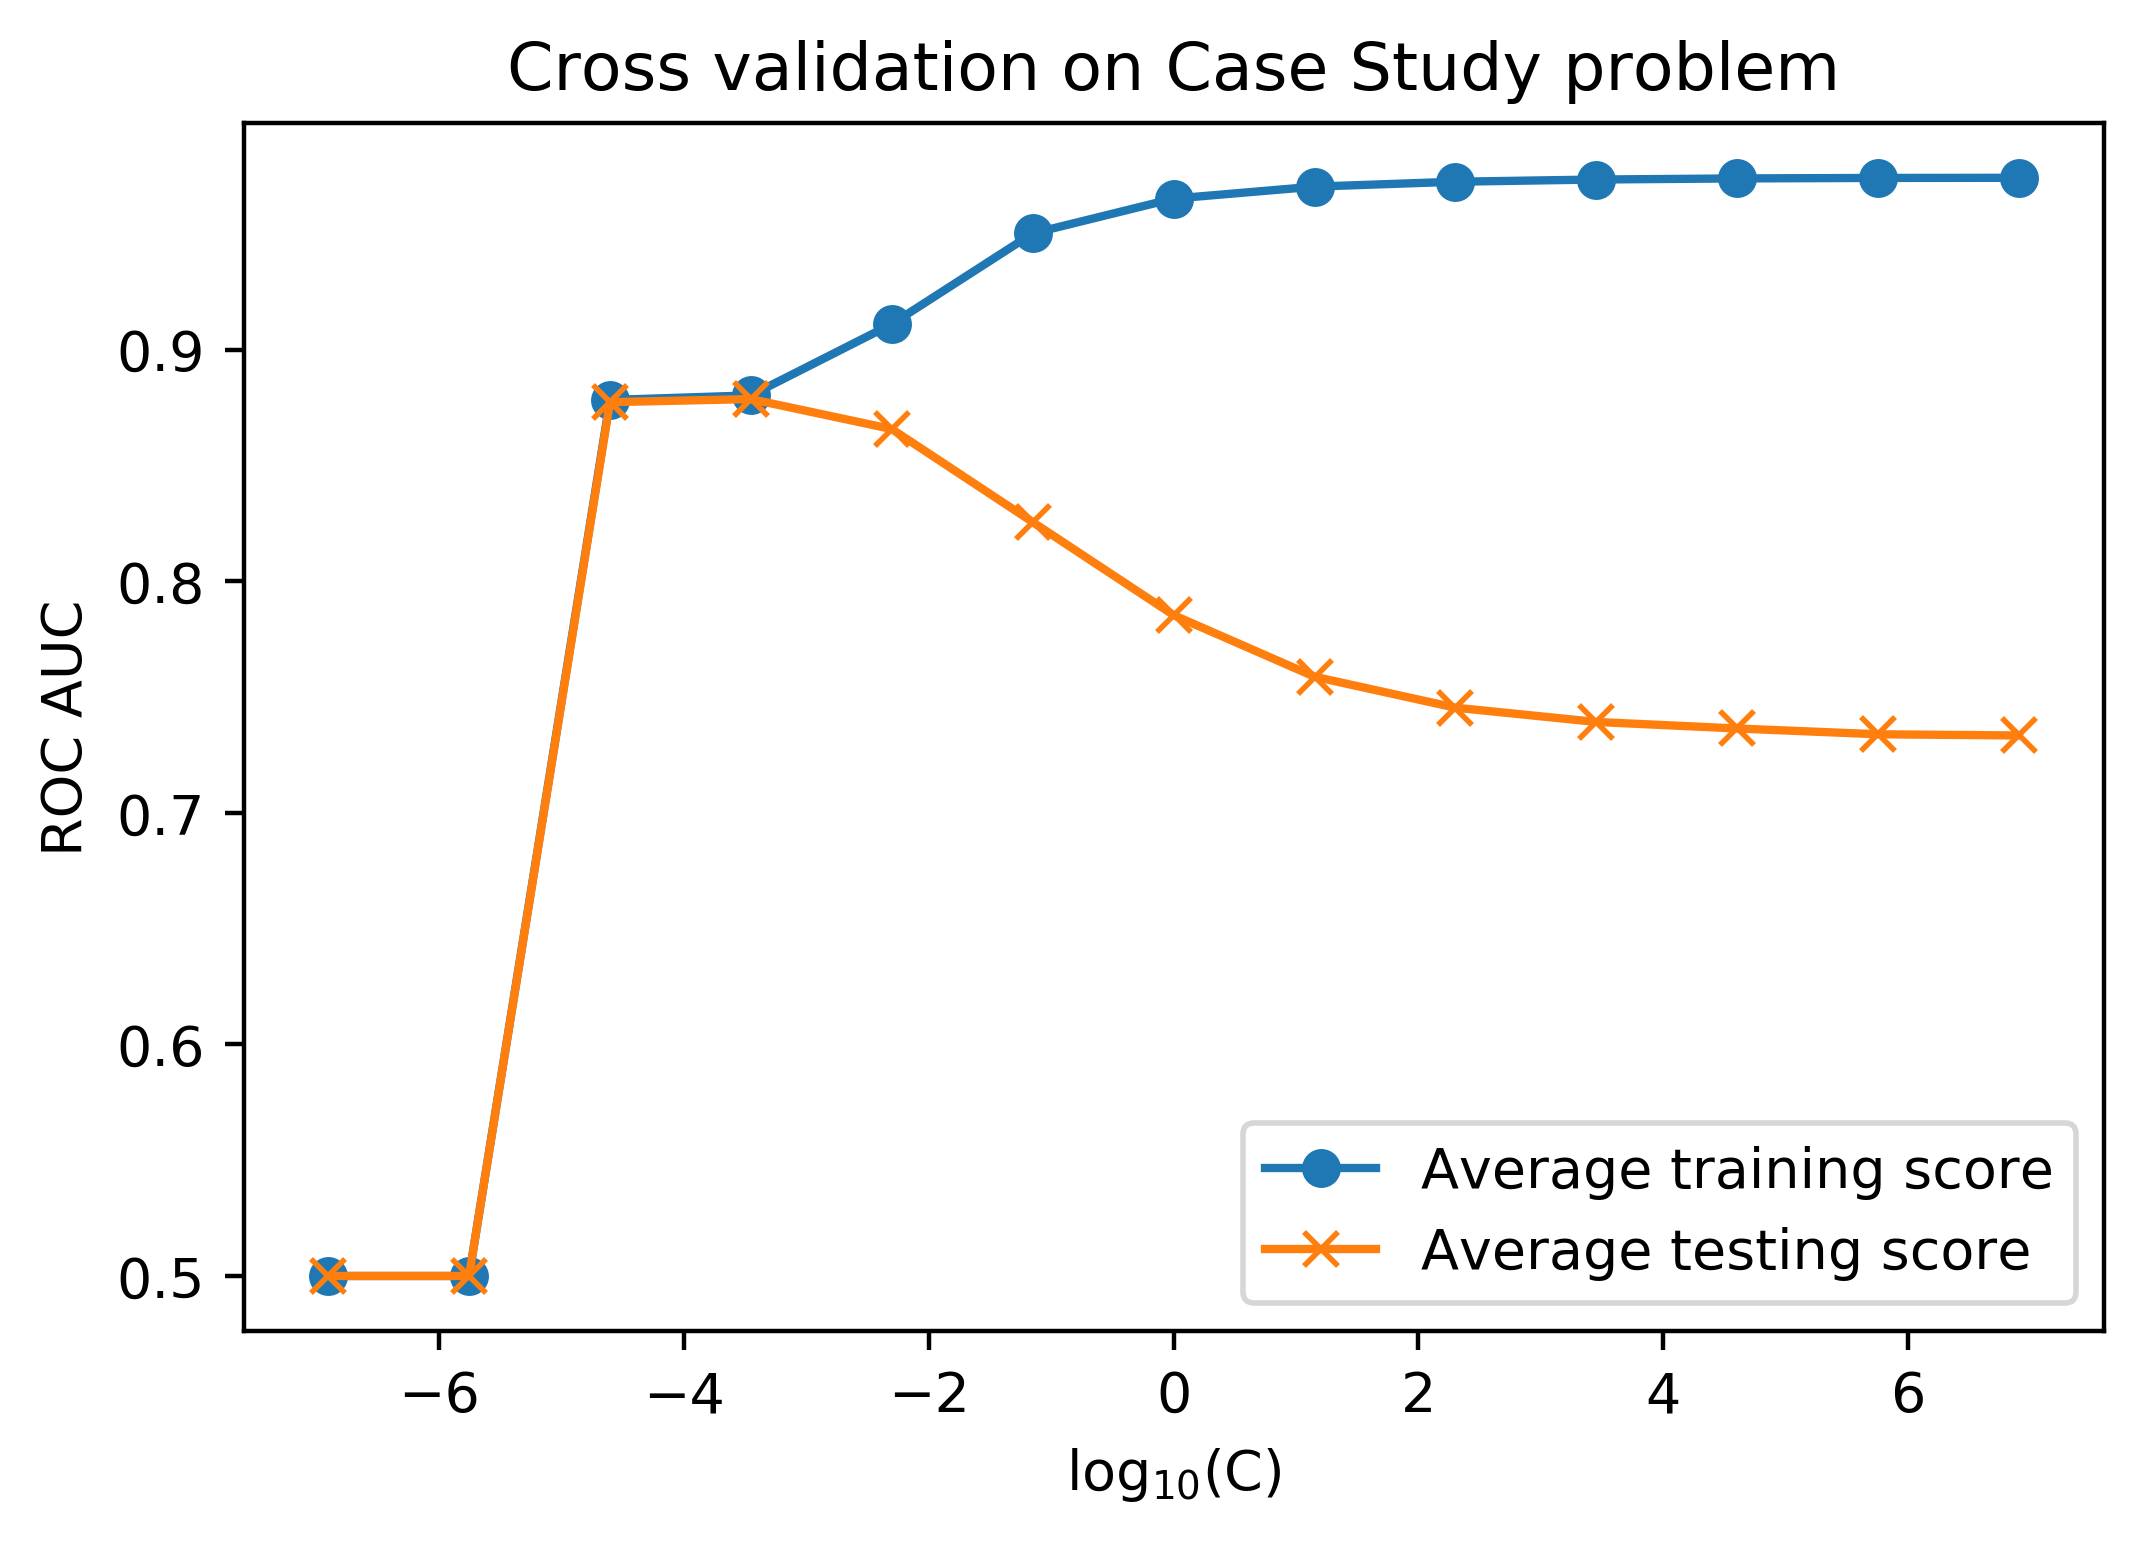

In [52]:
plt.plot(C_logVal, np.mean(cv_train_roc_auc, axis=0), '-o',
        label='Average training score')
plt.plot(C_logVal, np.mean(cv_test_roc_auc, axis=0), '-x',
        label='Average testing score')
plt.ylabel('ROC AUC')
plt.xlabel('log$_{10}$(C)')
plt.legend()
plt.title('Cross validation on Case Study problem')

In [53]:
best_C_val_bool = C_val_exponents == -1.5
best_C_val_bool.astype(int)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0])

In [54]:
best_C_val_ix = np.nonzero(best_C_val_bool.astype(int))
best_C_val_ix[0][0]

9

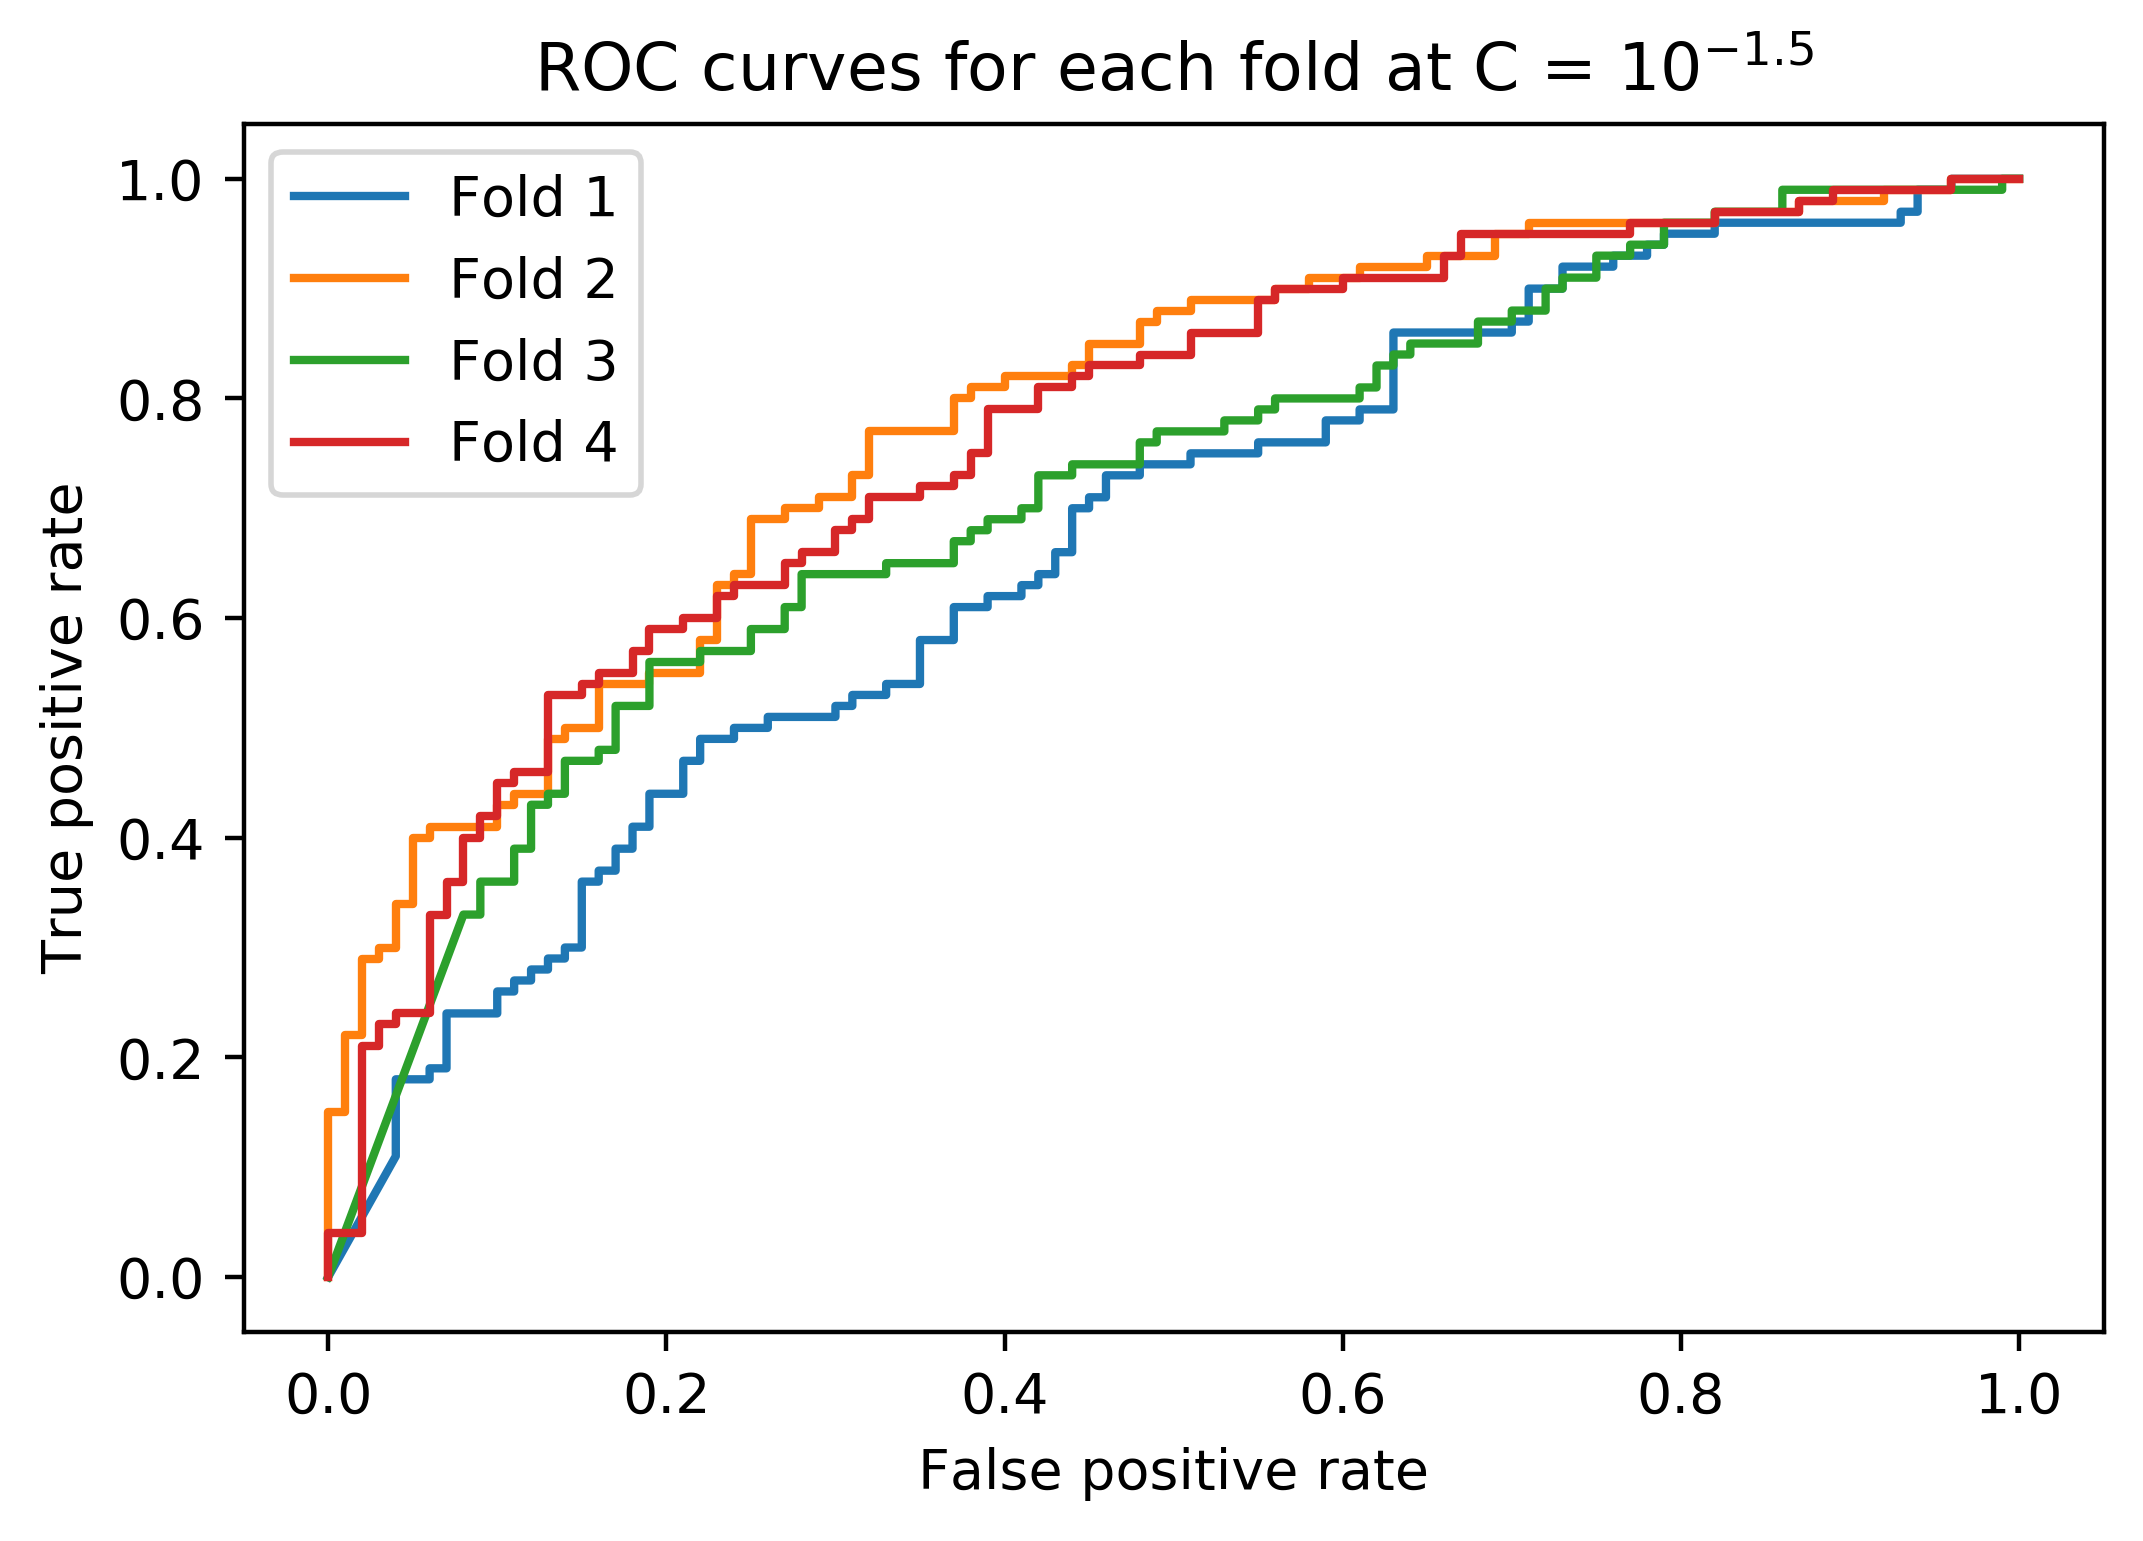

In [55]:
for this_fold in range(n_folds):
    fpr = cv_test_roc[best_C_val_ix[0][0]][this_fold][0]
    tpr = cv_test_roc[best_C_val_ix[0][0]][this_fold][1]
    plt.plot(fpr, tpr, label='Fold {}'.format(this_fold+1))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curves for each fold at C = $10^{-1.5}$')
plt.legend()

_____________________________________________________
**Up next, create interaction features for the case study data using scikit-learn's `PolynomialFeatures`. You should use 2 as the degree of polynomial features. Confirm that the number of new features makes sense.**

In [56]:
#np.mean(cv_test_roc_auc, axis=0)

In [57]:
from sklearn.preprocessing import PolynomialFeatures

In [58]:
make_interactions = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
X = df[features].values
X_interact = make_interactions.fit_transform(X)

In [59]:
X_interact.shape

(26664, 153)

_____________________________________________________
**Finally, repeat the cross-validation procedure and observe the model performance now.**

In [60]:
# Using the new features, make a 80:20 train/test split using a random seed of 24.**
X_train, X_test, y_train, y_test = train_test_split(
X_interact, df['default payment next month'].values,
test_size=0.2, random_state=24)

In [61]:
print(X_train.shape)
print(X_test.shape)

(21331, 153)
(5333, 153)


In [62]:
# Call the cross_val_C_search_pipe() function using the new training data.
# All other parameters should remain the same.
# Note that this training may take a few minutes due to the larger number of features.

In [63]:
def cross_val_C_search_pipe(k_folds, C_vals, pipeline, X, Y):
    
    n_folds = k_folds.n_splits
    cv_train_roc_auc = np.empty((n_folds, len(C_vals)))
    cv_test_roc_auc = np.empty((n_folds, len(C_vals)))
    cv_test_roc = [[]]*len(C_vals)

    for c_val_counter in range(len(C_vals)):
        #Set the C value for the model object
        pipeline.set_params(model__C = C_vals[c_val_counter])
        #Count folds for each value of C
        fold_counter = 0
        #Get training and testing indices for each fold
        for train_index, test_index in k_folds.split(X, Y):
            #Subset the features and response, for training and testing data for
            #this fold
            X_cv_train, X_cv_test = X[train_index], X[test_index]
            y_cv_train, y_cv_test = Y[train_index], Y[test_index]

            #Fit the model on the training data
            pipeline.fit(X_cv_train, y_cv_train)

            #Get the training ROC AUC
            y_cv_train_predict_proba = pipeline.predict_proba(X_cv_train)
            cv_train_roc_auc[fold_counter, c_val_counter] = \
            roc_auc_score(y_cv_train, y_cv_train_predict_proba[:,1])

            #Get the testing ROC AUC
            y_cv_test_predict_proba = pipeline.predict_proba(X_cv_test)
            cv_test_roc_auc[fold_counter, c_val_counter] = \
            roc_auc_score(y_cv_test, y_cv_test_predict_proba[:,1])
            
            #Testing ROC curves for each fold
            this_fold_roc = roc_curve(y_cv_test, y_cv_test_predict_proba[:,1])
            cv_test_roc[c_val_counter].append(this_fold_roc)

            #Increment the fold counter
            fold_counter += 1

        #Indicate progress
        print('Done with C = {}'.format(pipeline.get_params()['model__C']))

    return cv_train_roc_auc, cv_test_roc_auc, cv_test_roc

In [64]:
cv_train_roc_auc, cv_test_roc_auc, cv_test_roc = \
cross_val_C_search_pipe(k_folds, C_vals, scale_lr_pipeline, X_train, y_train)

C:\Users\ankur\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\ankur\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\ankur\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\ankur\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Done with C = 1000.0


C:\Users\ankur\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\ankur\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\ankur\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\ankur\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Done with C = 316.22776601683796


C:\Users\ankur\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\ankur\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\ankur\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\ankur\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Done with C = 100.0


C:\Users\ankur\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\ankur\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\ankur\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\ankur\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Done with C = 31.622776601683793


C:\Users\ankur\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\ankur\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\ankur\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\ankur\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Done with C = 10.0


C:\Users\ankur\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\ankur\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\ankur\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\ankur\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Done with C = 3.1622776601683795


C:\Users\ankur\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\ankur\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\ankur\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Done with C = 1.0


C:\Users\ankur\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\ankur\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\ankur\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Done with C = 0.31622776601683794
Done with C = 0.1
Done with C = 0.03162277660168379
Done with C = 0.01
Done with C = 0.0031622776601683794
Done with C = 0.001


Text(0.5, 1.0, 'Cross validation scores averaged over all folds')

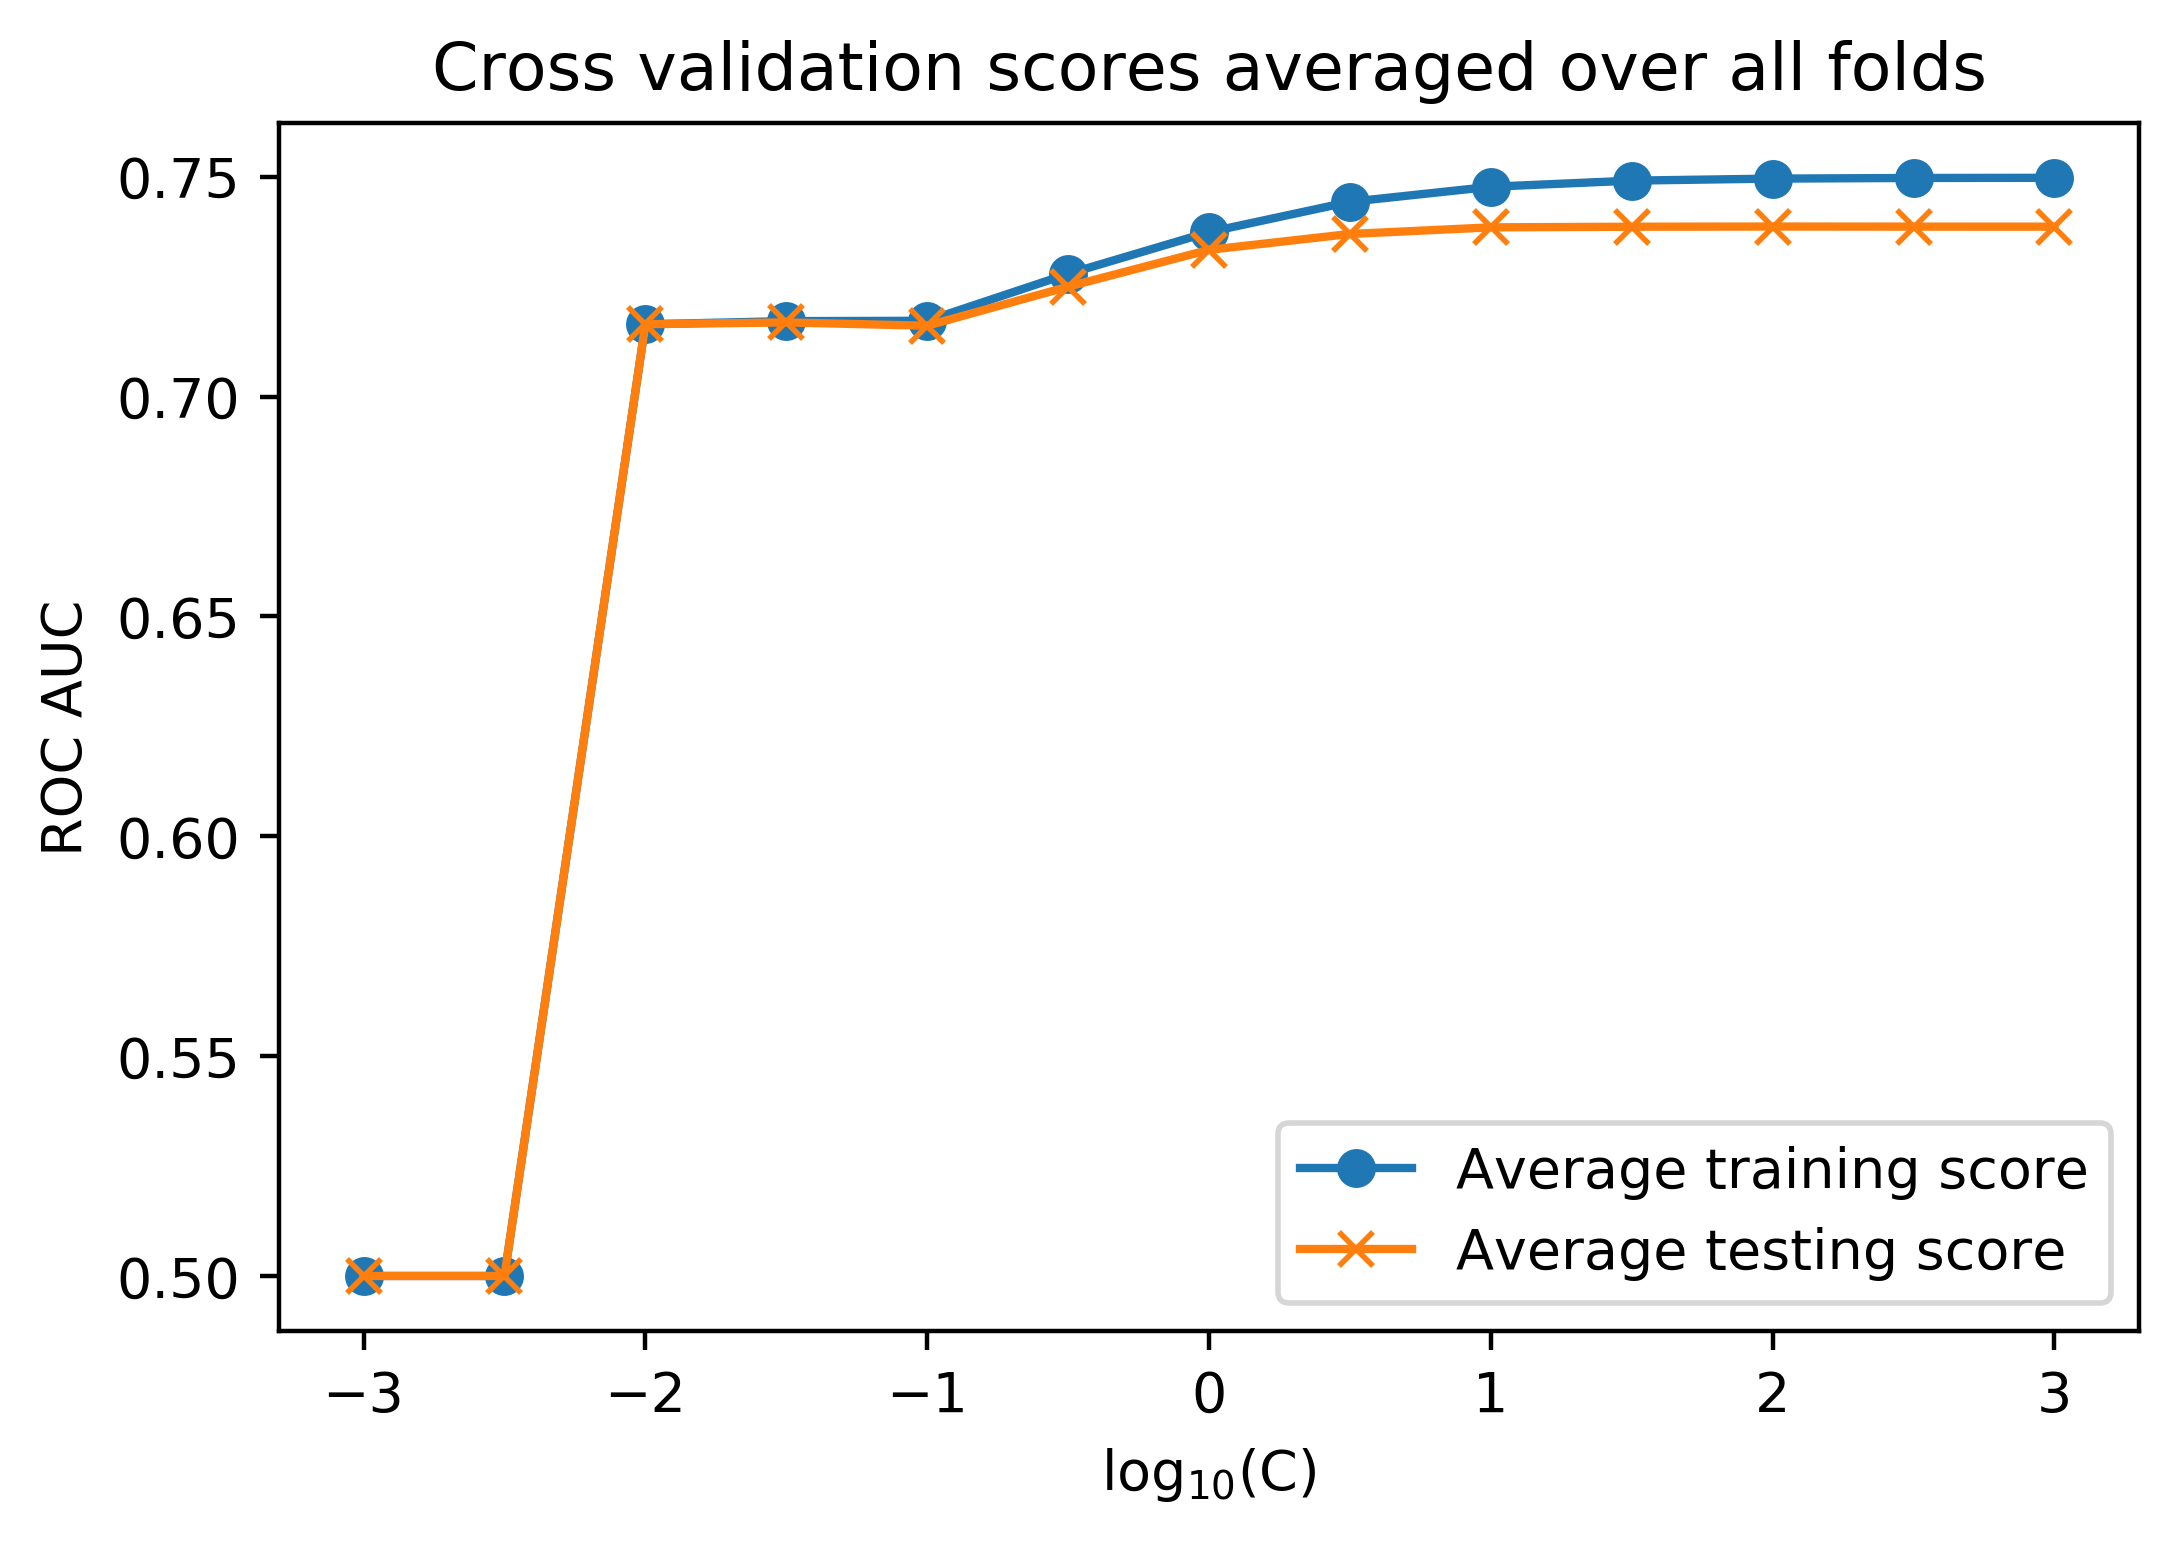

In [65]:
# Plot the average training and testing ROC AUC across folds, for each C value.
plt.plot(C_val_exponents, np.mean(cv_train_roc_auc, axis=0), '-o',
        label='Average training score')
plt.plot(C_val_exponents, np.mean(cv_test_roc_auc, axis=0), '-x',
        label='Average testing score')
plt.ylabel('ROC AUC')
plt.xlabel('log$_{10}$(C)')
plt.legend()
plt.title('Cross validation scores averaged over all folds')

**Take a look at the above graph. Does the average cross-validation testing performance improve with the interaction features? Is regularization useful?**

* In Above Graphs it's clear that 'Cross validation scores averaged over all folds' Is improved than 'Cross validation on         Case Study problem' and it's less differnce between 'Average testing score' & 'Average traning score' in 'Cross validation       scores averaged over all folds'.